# MSE Bias-Variance-Decomposition Analysis

This notebook contains the analysis of decomposing feature effect error (MSE), into bias and variance, for different models and datasets (§6.1 in the paper). We additionally provide a deeper analysis of selected interesting scenarios.

In [1]:
from pathlib import Path
from configparser import ConfigParser

import pandas as pd
import warnings

from current_research_feature_effects.plotting.table_formatting import format_dataframe, highlight_min_feature_metric
from current_research_feature_effects.plotting.plots import plot_feature_effect_error_table

warnings.simplefilter("ignore", pd.errors.PerformanceWarning)

In [2]:
EXPERIMENT_PATH = Path("../experiments/main_study_parallel")
config = ConfigParser()
config.read(EXPERIMENT_PATH / "main_study.ini")
effects_results_storage = config.get("storage", "effects_results")

## SimpleNormalCorrelated

### PDP

In [3]:
df_snc_pdp = pd.read_sql_table(
    "pdp_results", f"sqlite:///{EXPERIMENT_PATH}/SimpleNormalCorrelated/{effects_results_storage}"
)
format_dataframe(df_snc_pdp).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}")

In [4]:
# ---- for paper ----
mask = (df_snc_pdp["feature"] != "x_4") & (df_snc_pdp["model"] != "LinReg")
format_dataframe(df_snc_pdp[mask]).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}").to_latex("tab/snc_pdp_results_table.tex", convert_css=True)

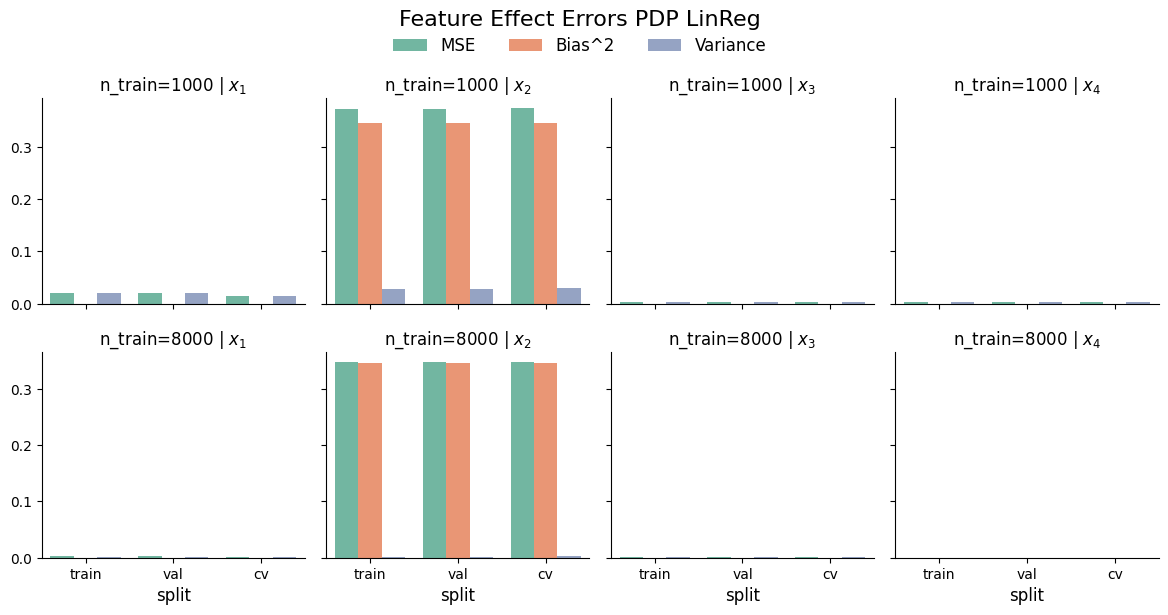

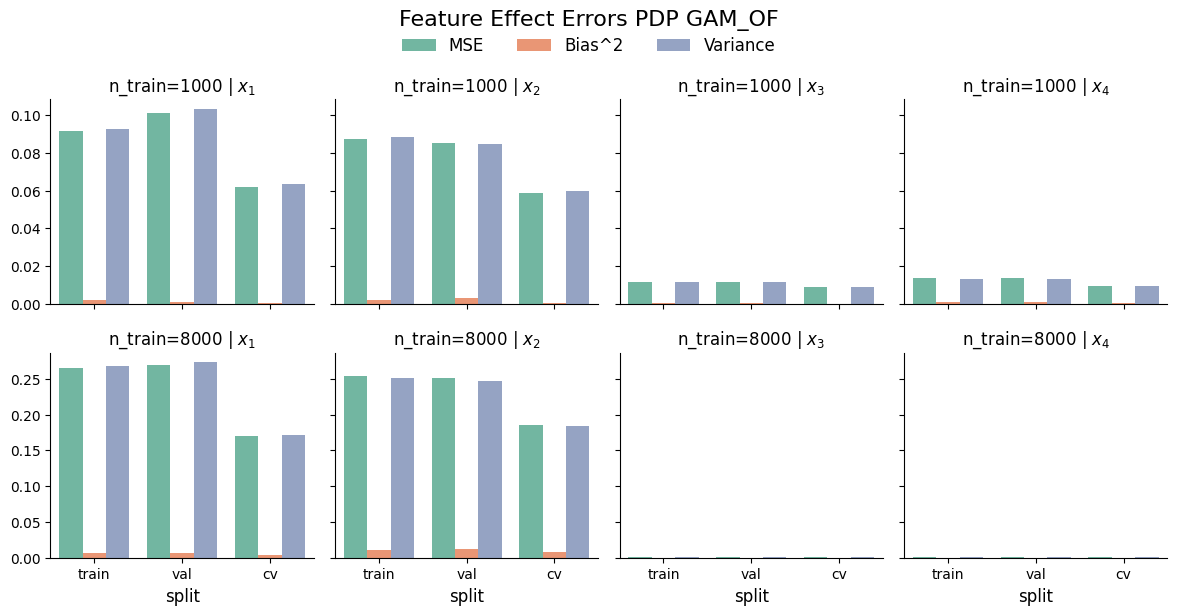

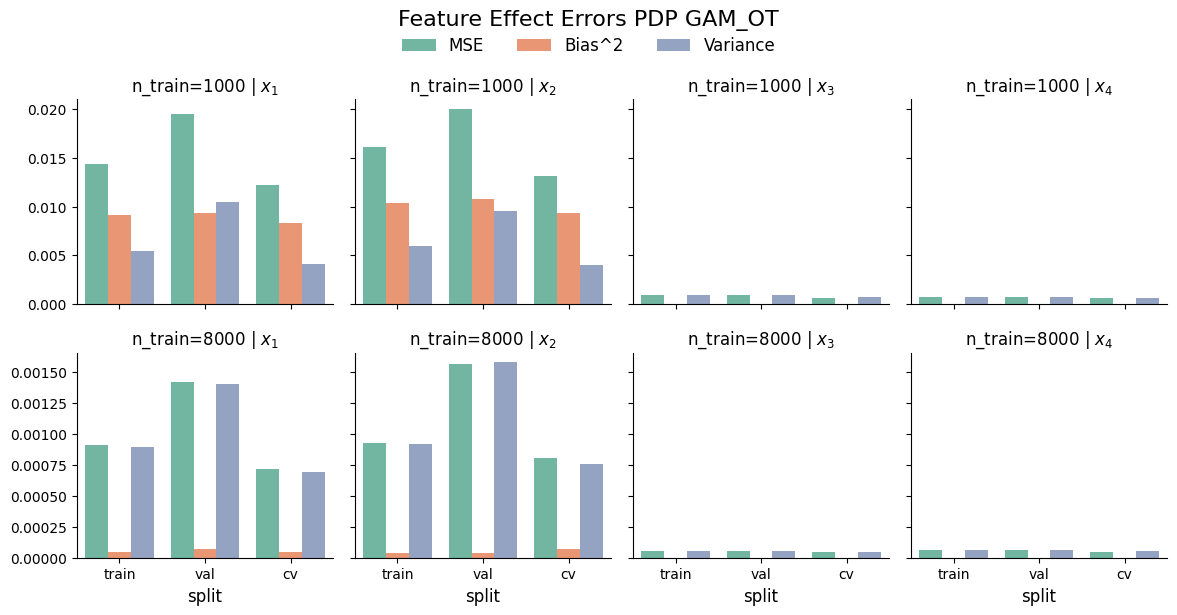

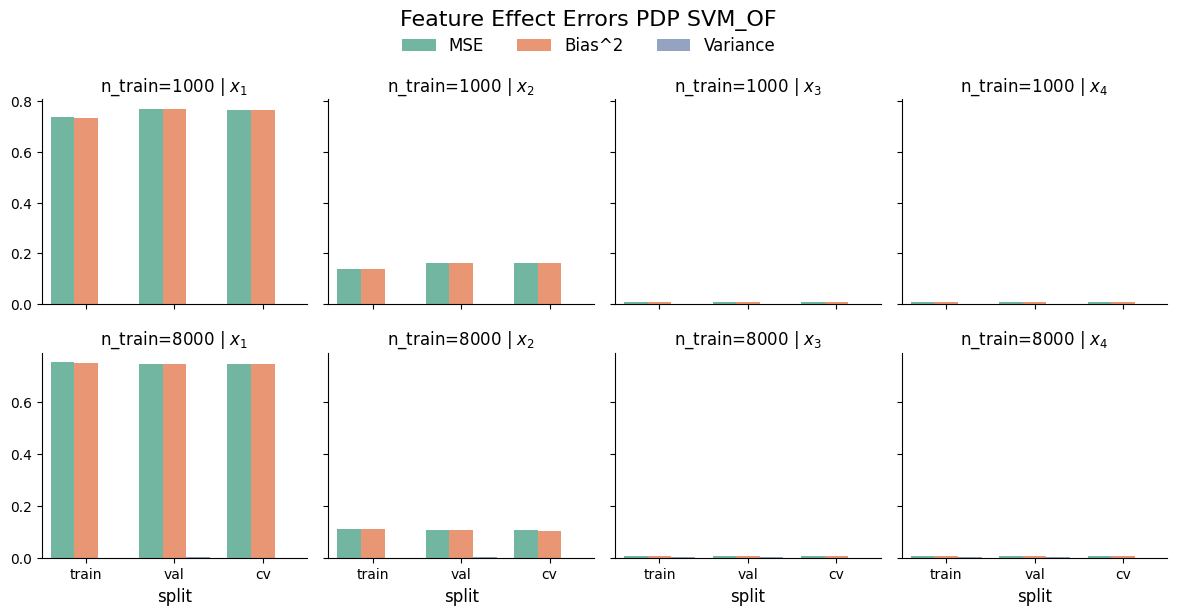

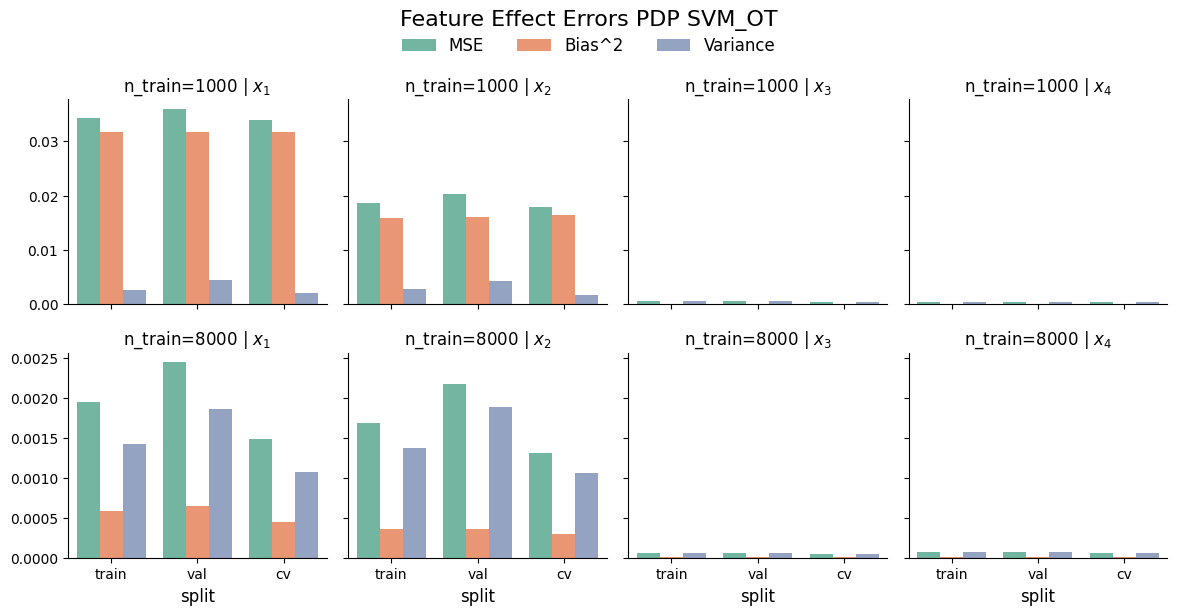

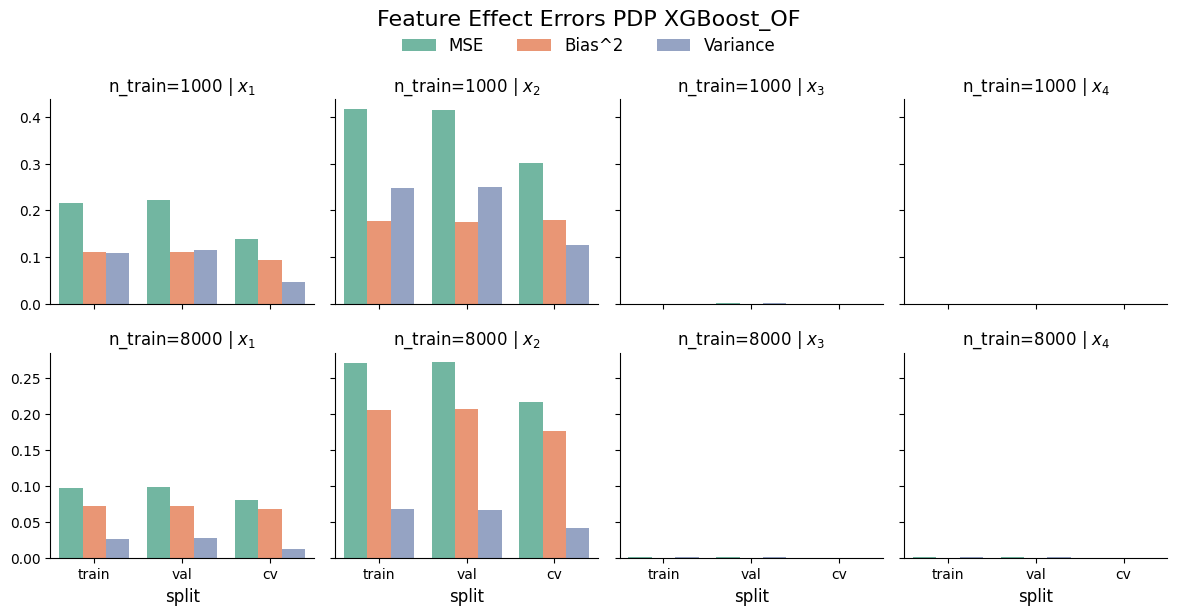

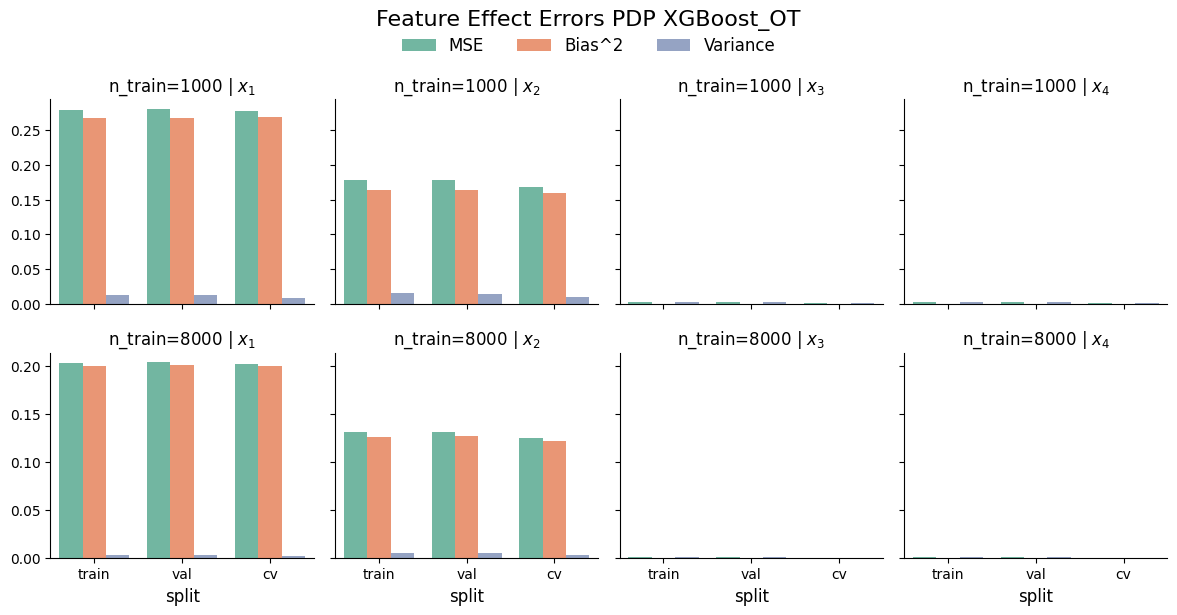

In [5]:
plot_feature_effect_error_table(
    df_snc_pdp,  # .loc[(df_snc_pdp.feature == "x_1") | (df_snc_pdp.feature == "x_2")],
    models=["LinReg", "GAM_OF", "GAM_OT", "SVM_OF", "SVM_OT", "XGBoost_OF", "XGBoost_OT"],
    type="pdp",
    # save_figs=Path("../paper/img/SNC-all/"),
    # large_font=True,
    # show_title=False,
)

### ALE

In [6]:
df_snc_ale = pd.read_sql_table(
    "ale_results", f"sqlite:///{EXPERIMENT_PATH}/SimpleNormalCorrelated/{effects_results_storage}"
)


display(format_dataframe(df_snc_ale).style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}"))

In [7]:
# ---- for paper ----
mask = (df_snc_ale["feature"] != "x_4") & (df_snc_ale["model"] != "LinReg")
format_dataframe(df_snc_ale[mask]).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}").to_latex("tab/snc_ale_results_table.tex", convert_css=True)

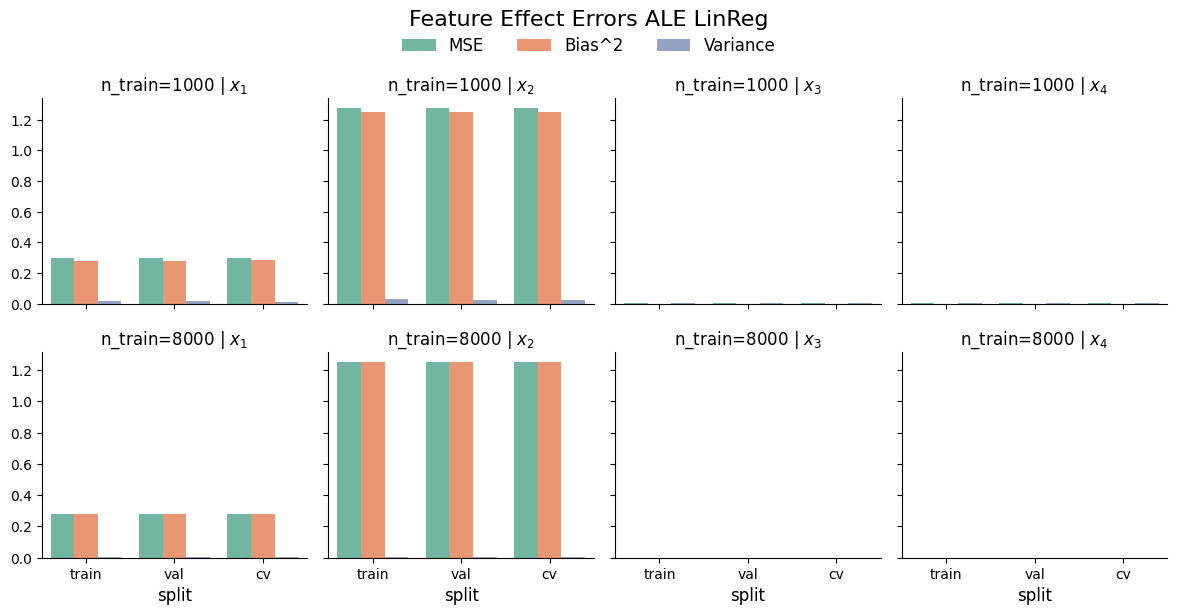

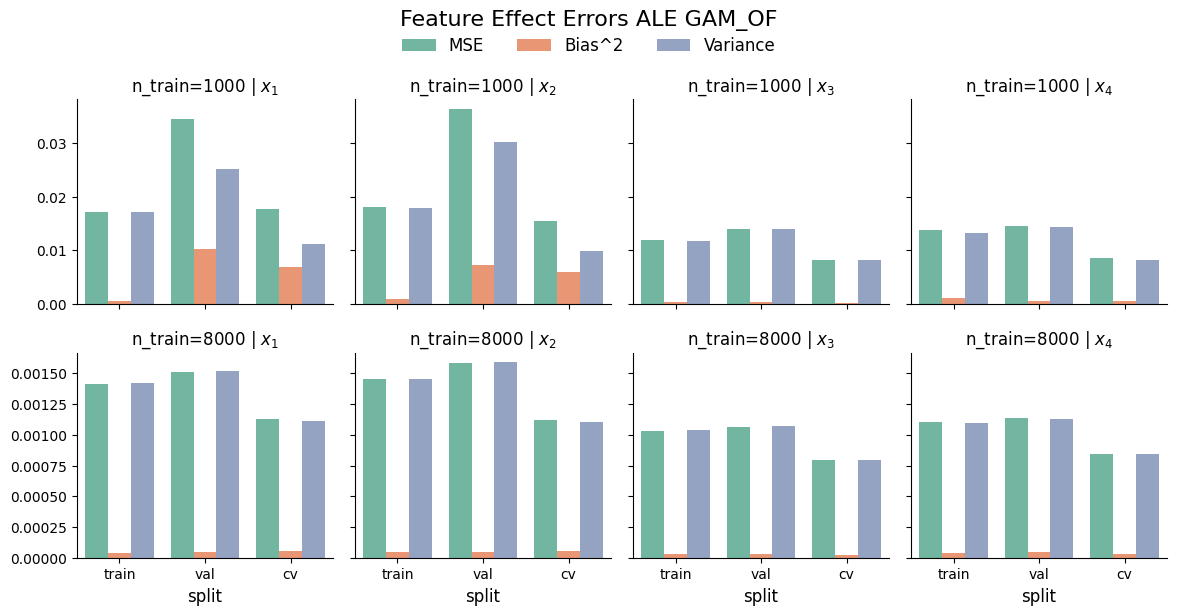

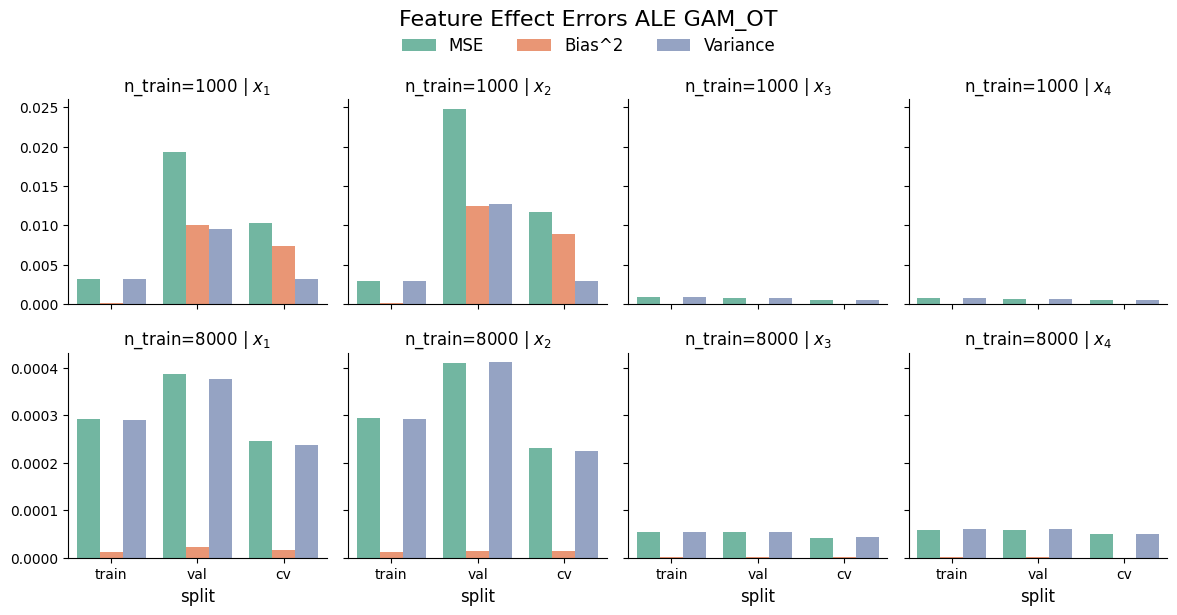

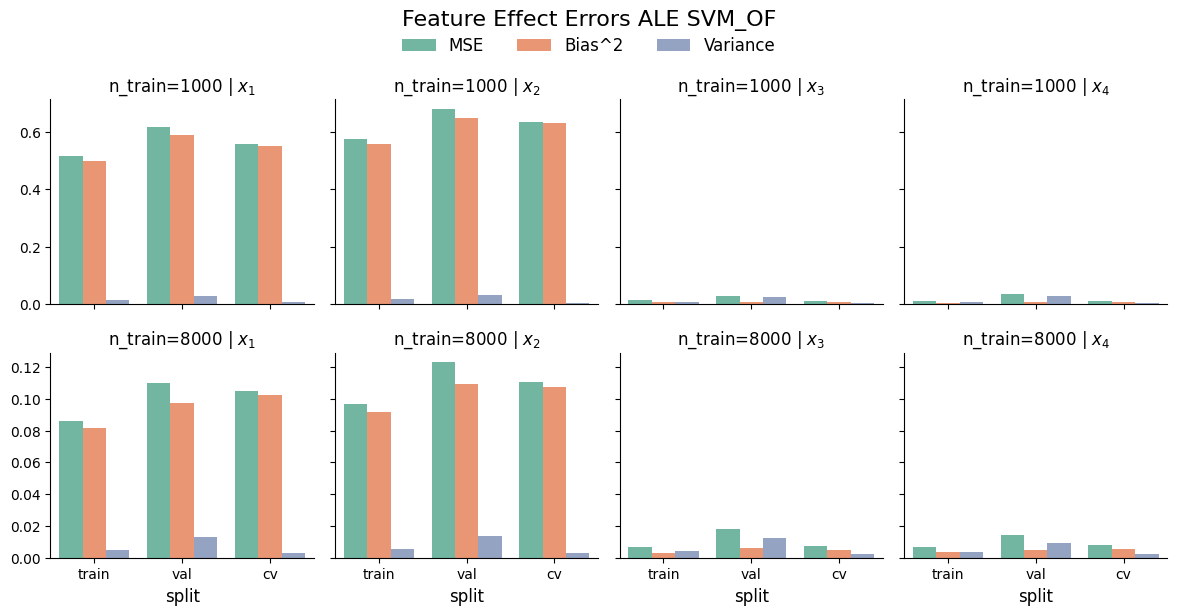

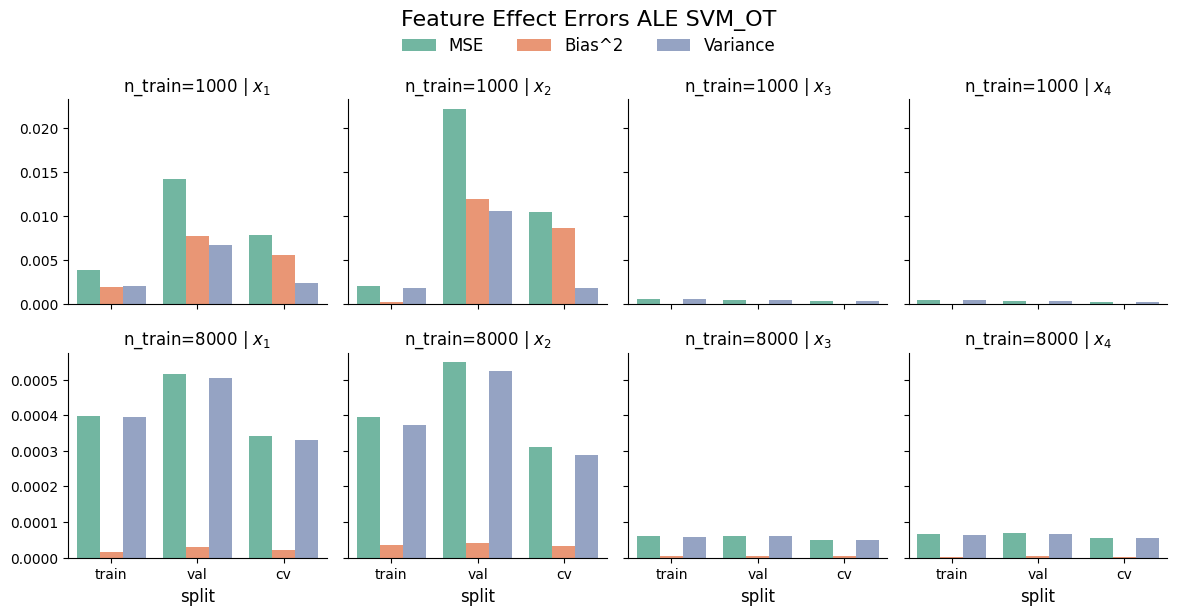

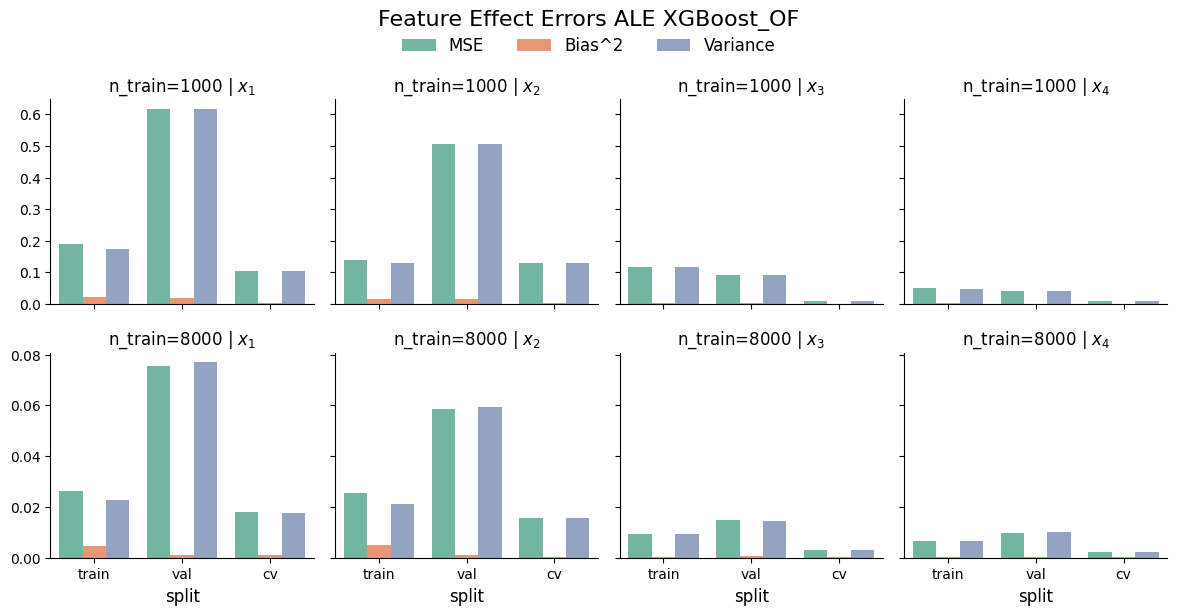

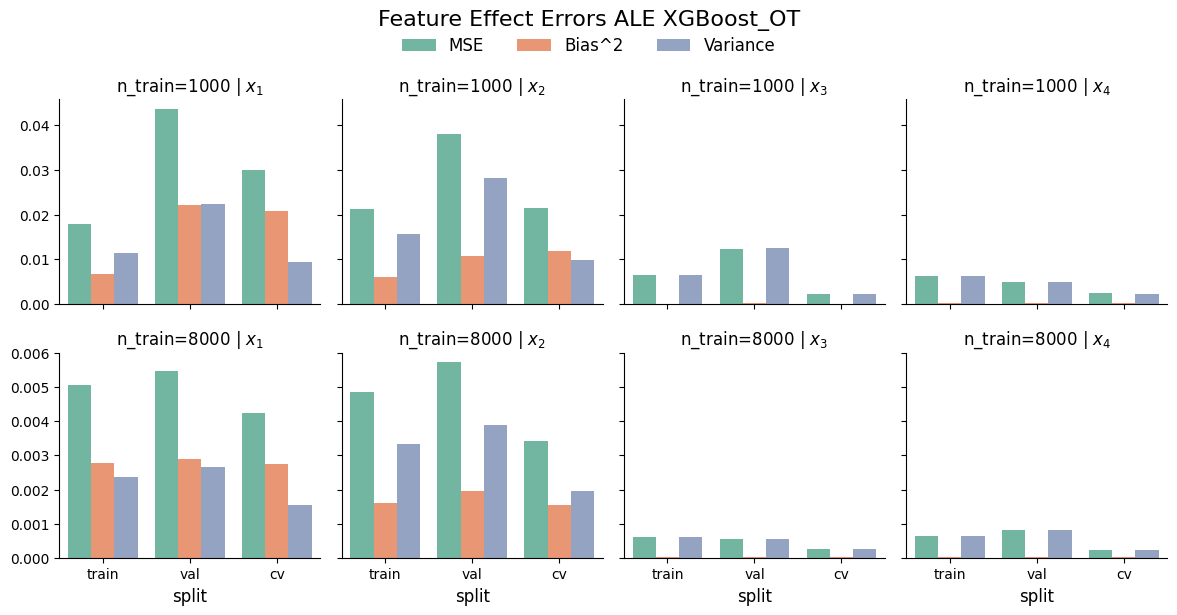

In [8]:
plot_feature_effect_error_table(
    df_snc_ale,  # loc[(df_snc_pdp.feature == "x_1") | (df_snc_pdp.feature == "x_2")],
    models=["LinReg", "GAM_OF", "GAM_OT", "SVM_OF", "SVM_OT", "XGBoost_OF", "XGBoost_OT"],
    type="ale",
    # save_figs=Path("../paper/img/SNC-all/"),
    # large_font=True,
    # show_title=False,
)

## Friedman1

### PDP

In [9]:
df_fr1_pdp = pd.read_sql_table("pdp_results", f"sqlite:///{EXPERIMENT_PATH}/Friedman1{effects_results_storage}")
format_dataframe(df_fr1_pdp).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}")

In [10]:
# ---- for paper ----
mask = (~df_fr1_pdp["feature"].isin(["x_2", "x_4", "x_6", "x_7"])) & (df_fr1_pdp["model"] != "LinReg")
format_dataframe(df_fr1_pdp[mask]).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}").to_latex("tab/fr1_pdp_results_table.tex", convert_css=True)

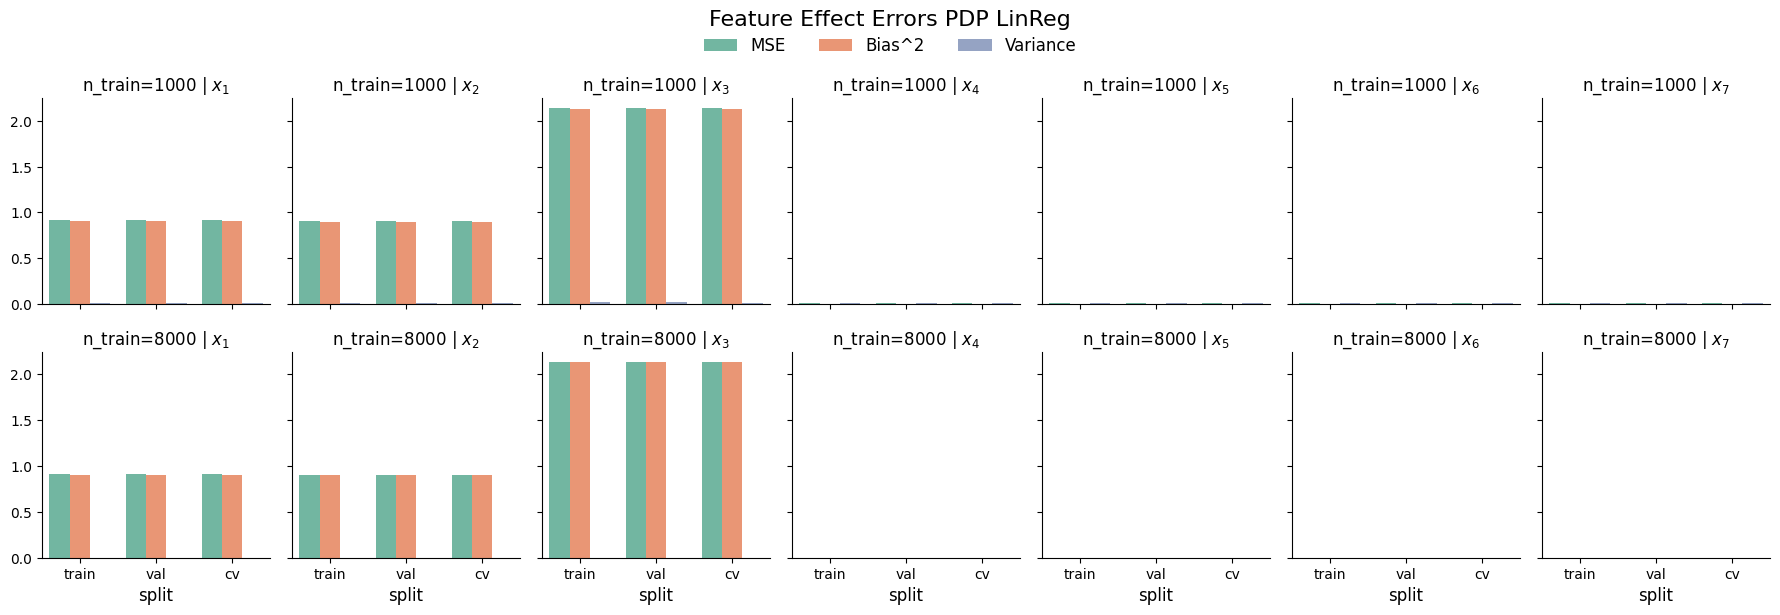

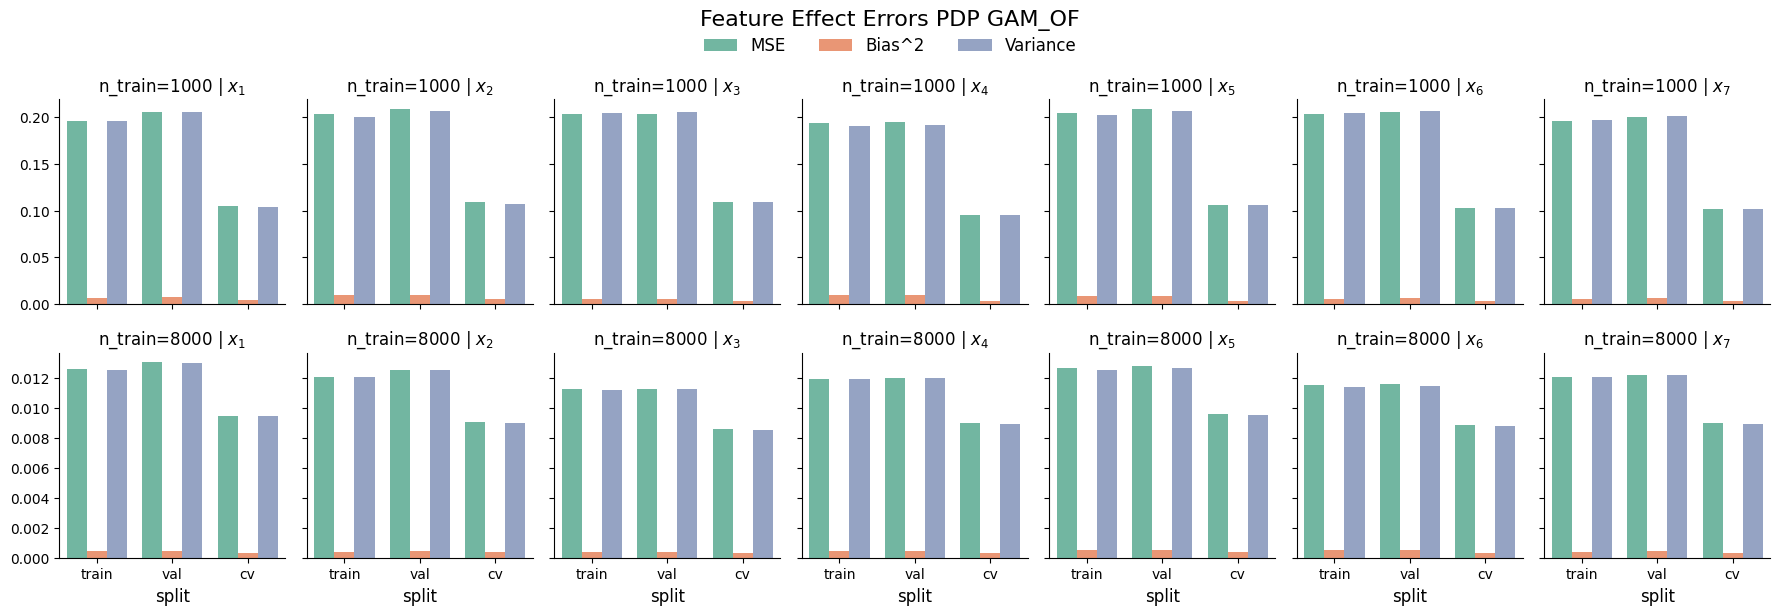

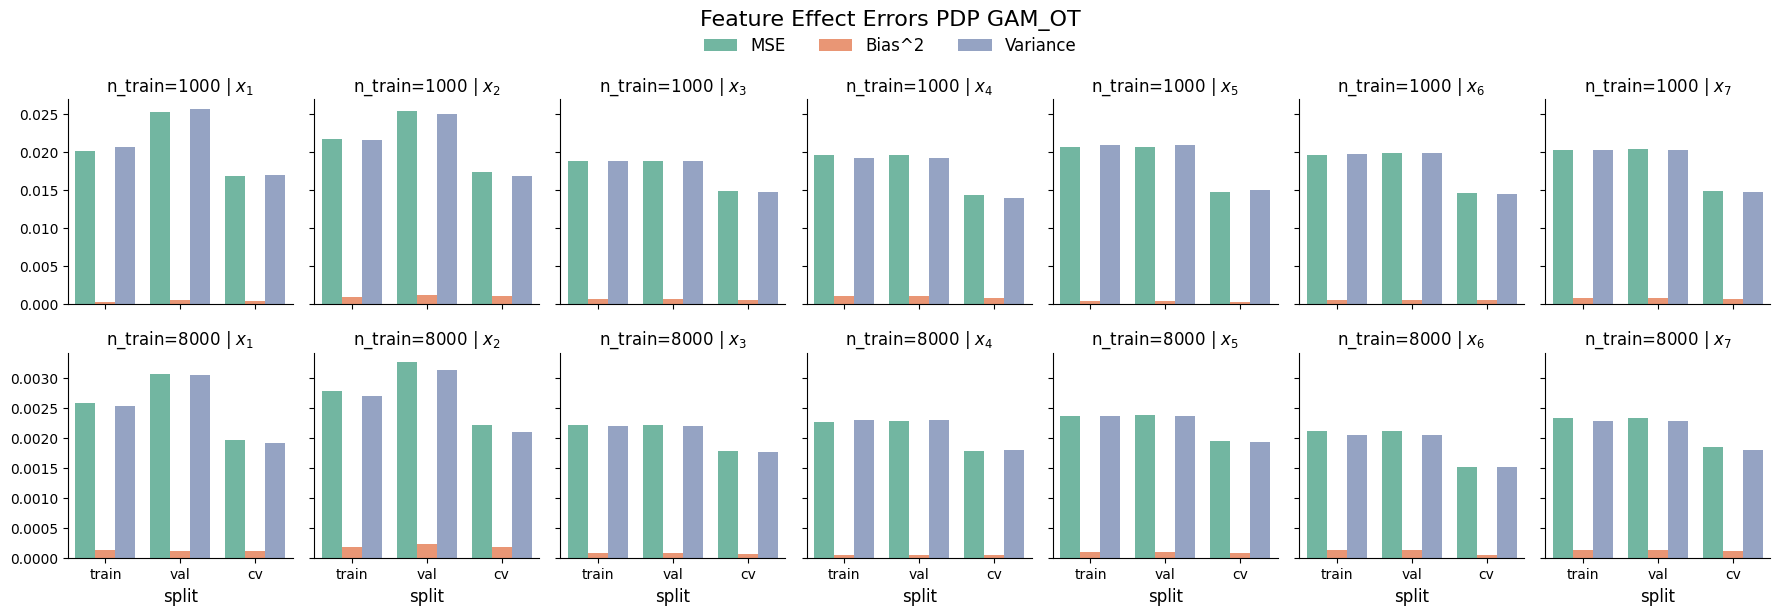

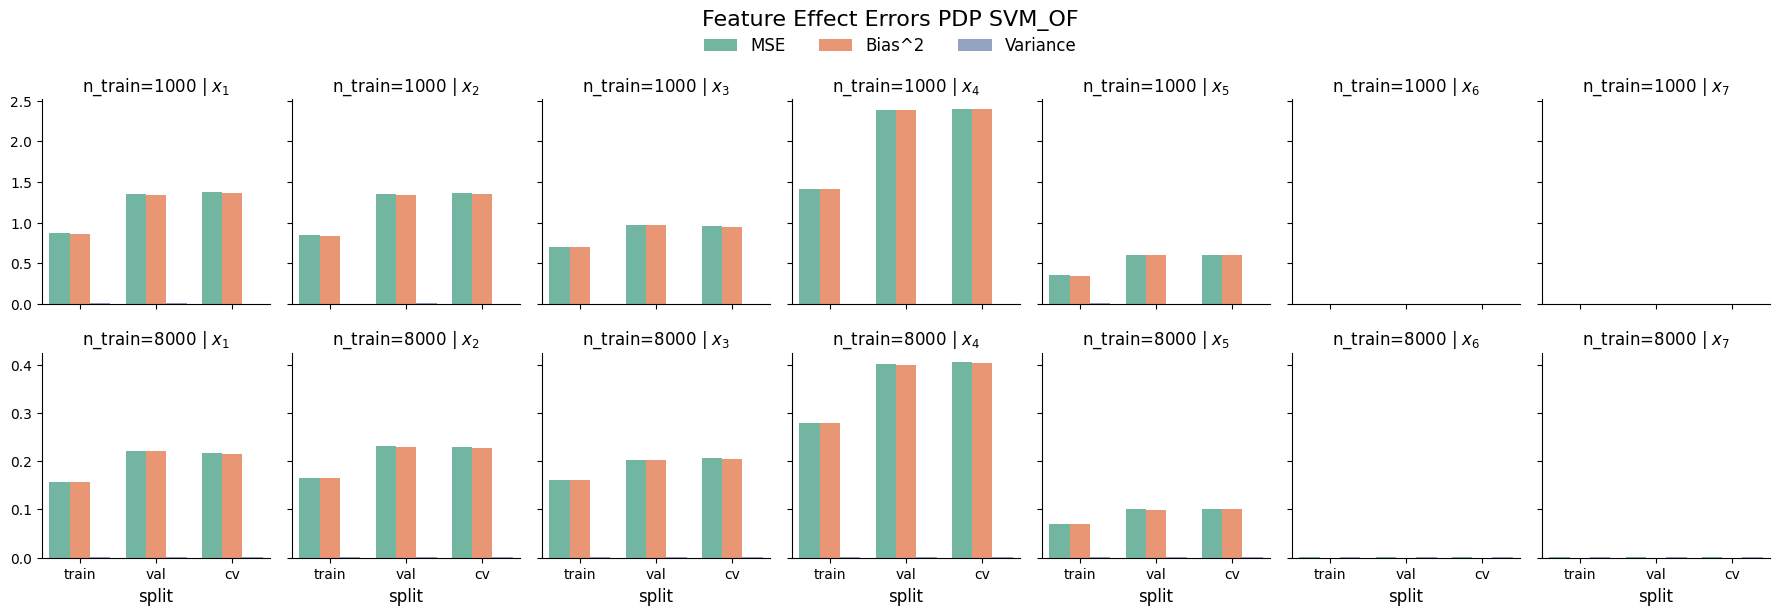

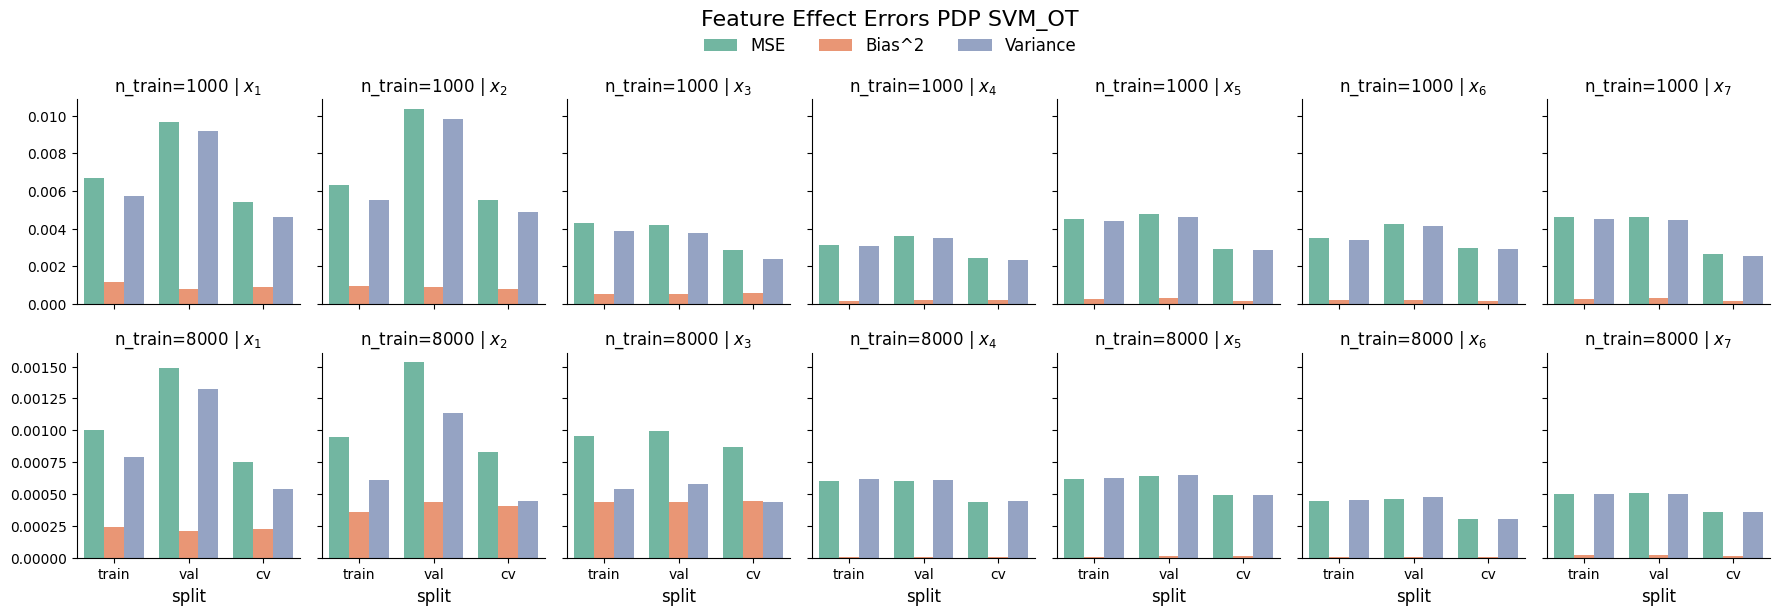

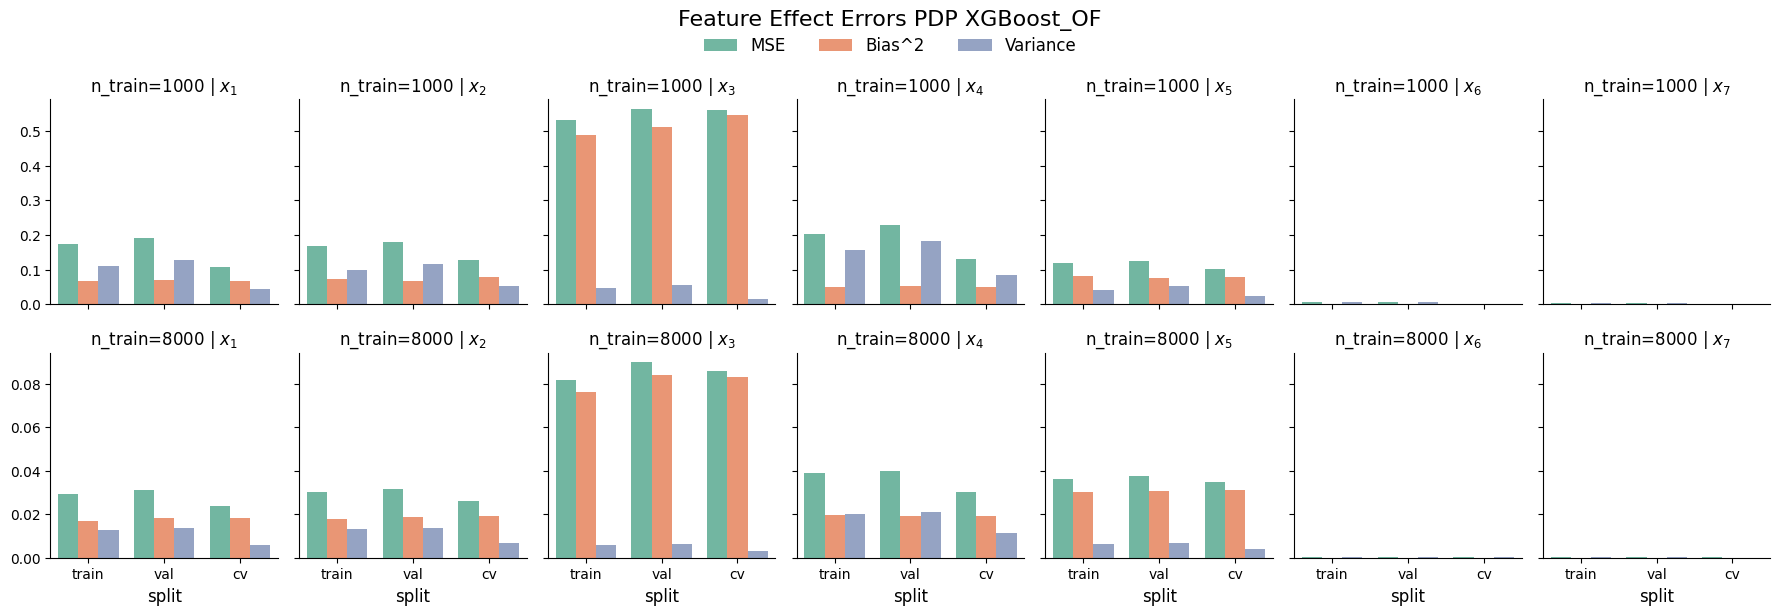

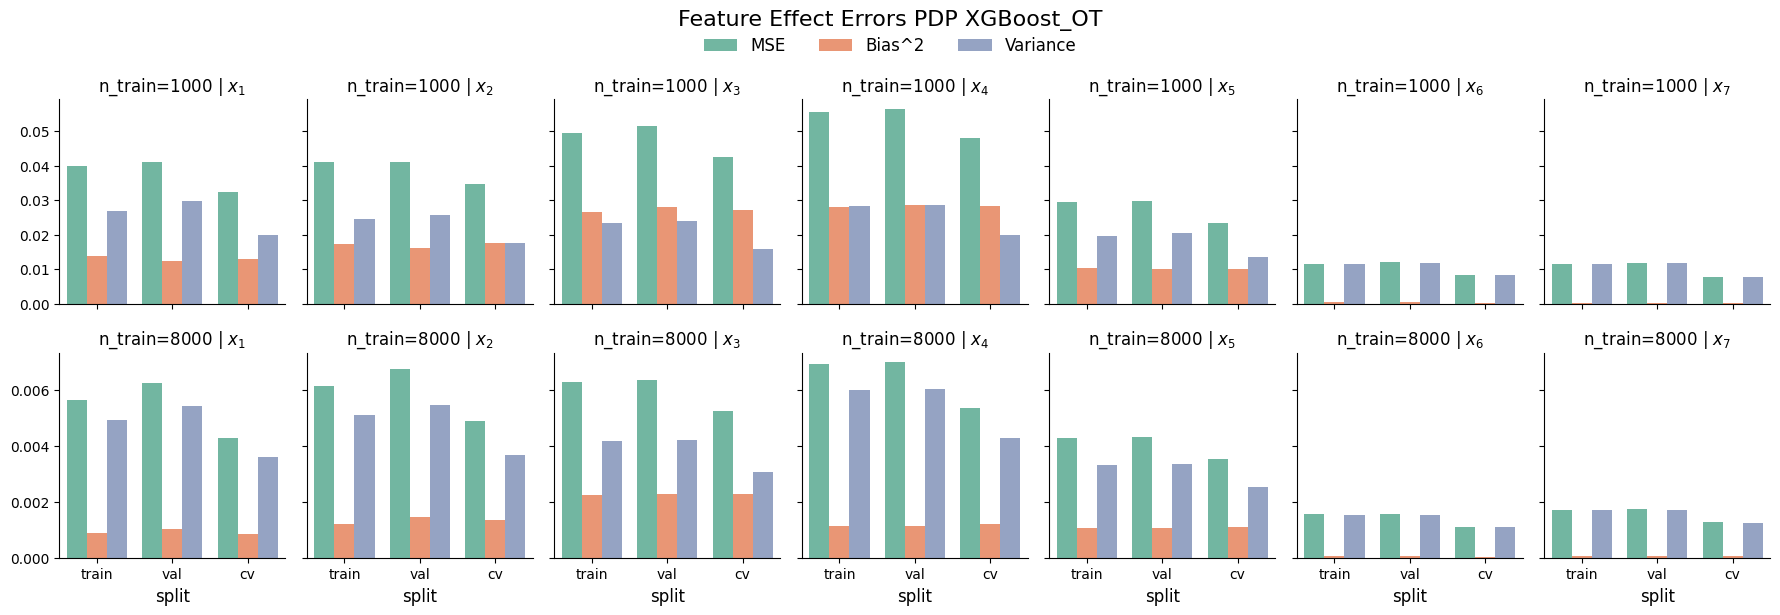

In [11]:
plot_feature_effect_error_table(
    df_fr1_pdp,
    models=["LinReg", "GAM_OF", "GAM_OT", "SVM_OF", "SVM_OT", "XGBoost_OF", "XGBoost_OT"],
    type="pdp",
    # save_figs=Path("../paper/img/Friedman1-all/"),
    # large_font=True,
    # show_title=False,
)

### ALE

In [12]:
df_fr1_ale = pd.read_sql_table("ale_results", f"sqlite:///{EXPERIMENT_PATH}/Friedman1/{effects_results_storage}")
format_dataframe(df_fr1_ale).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}")

In [13]:
# ---- for paper ----
mask = (~df_fr1_ale["feature"].isin(["x_2", "x_4", "x_6", "x_7"])) & (df_fr1_ale["model"] != "LinReg")
format_dataframe(df_fr1_ale[mask]).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}").to_latex("tab/fr1_ale_results_table.tex", convert_css=True)

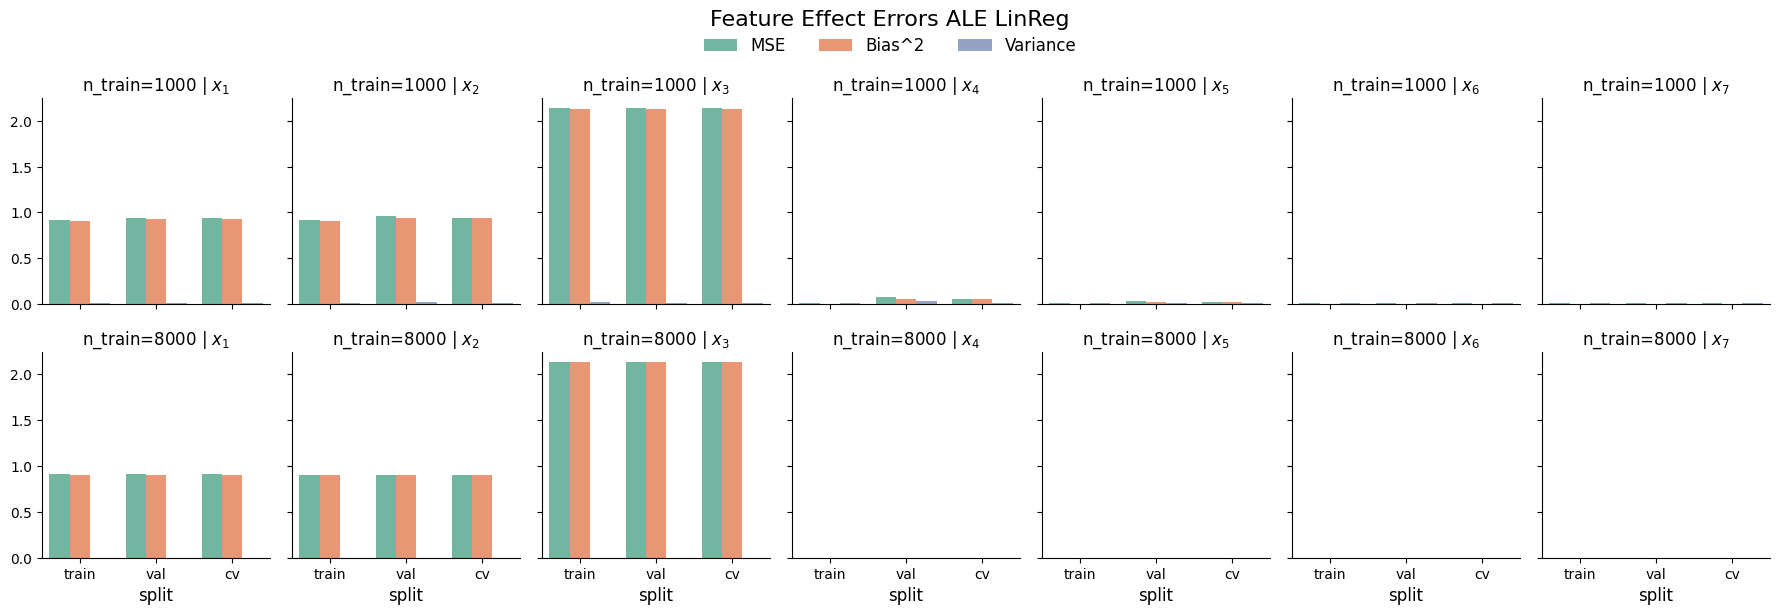

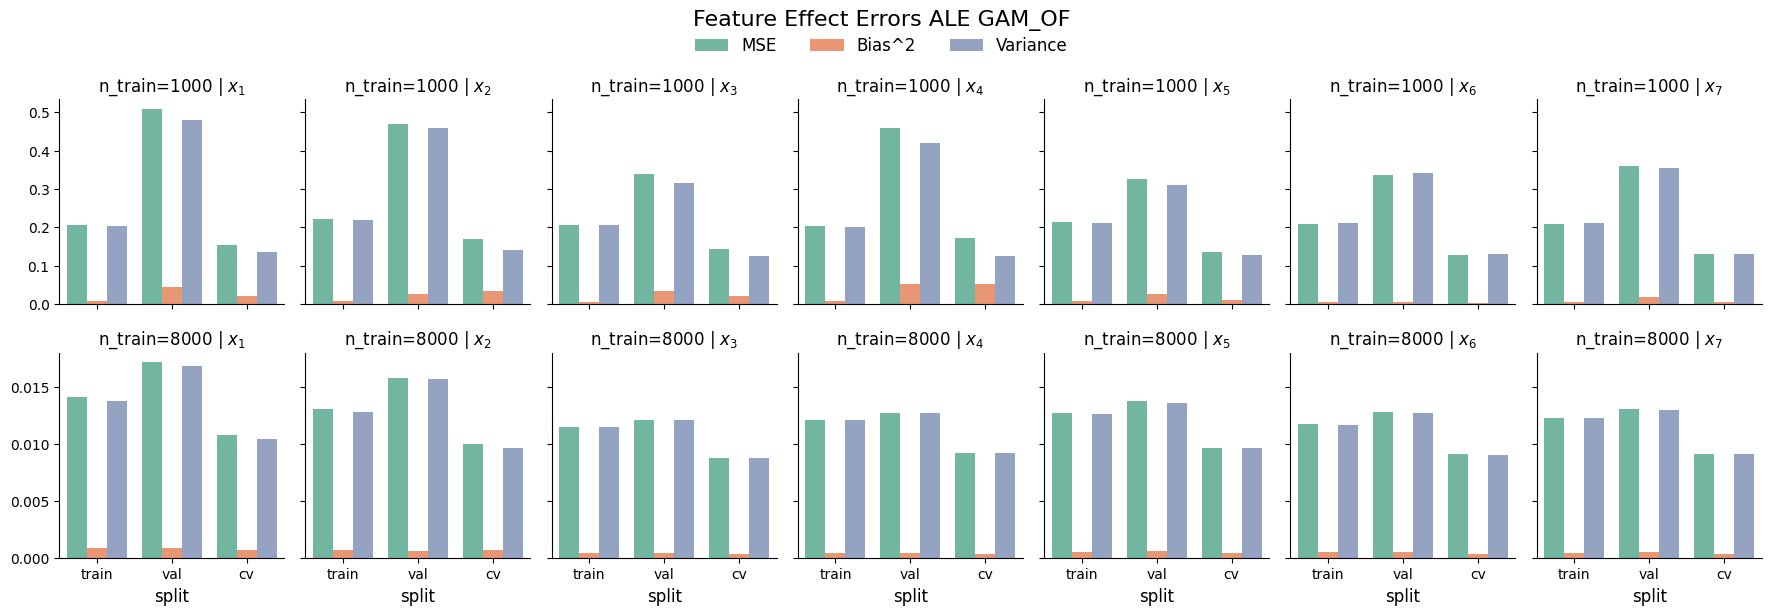

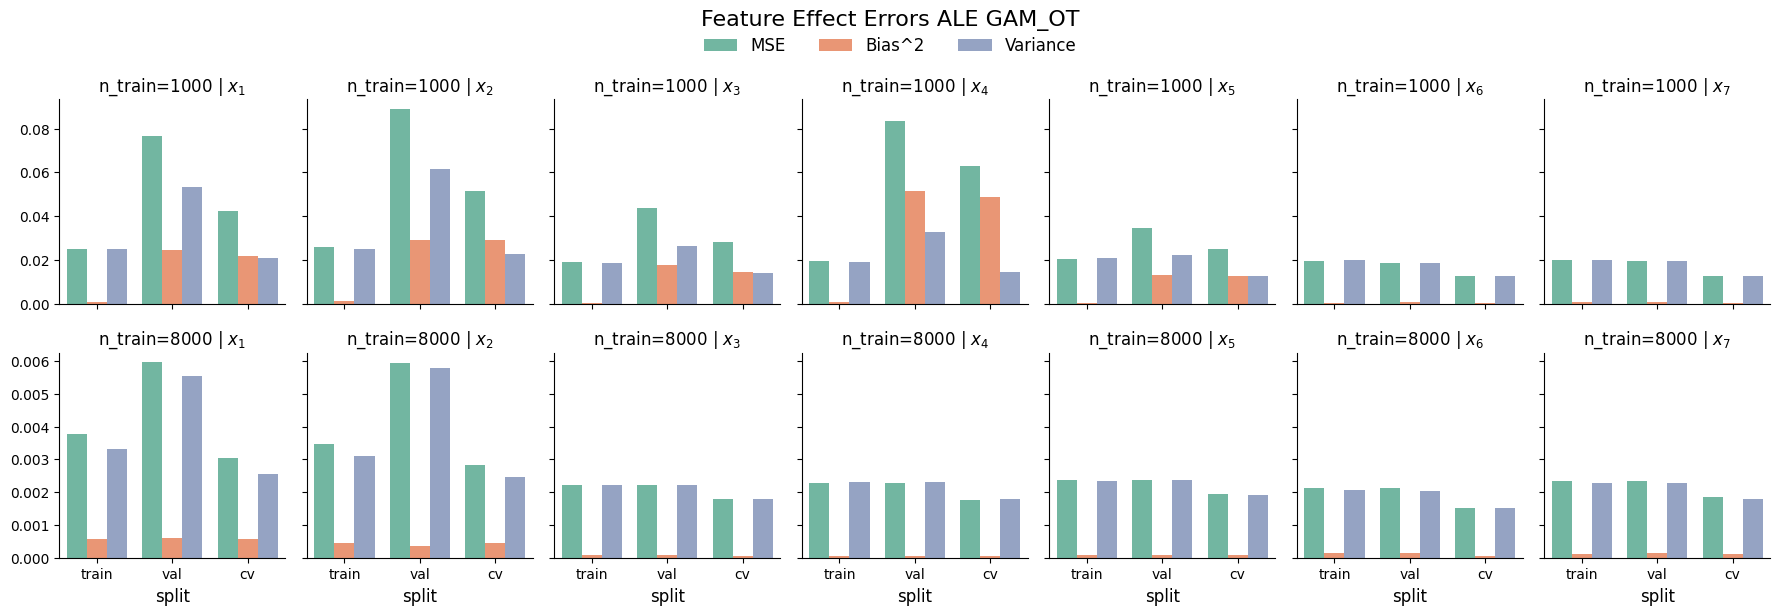

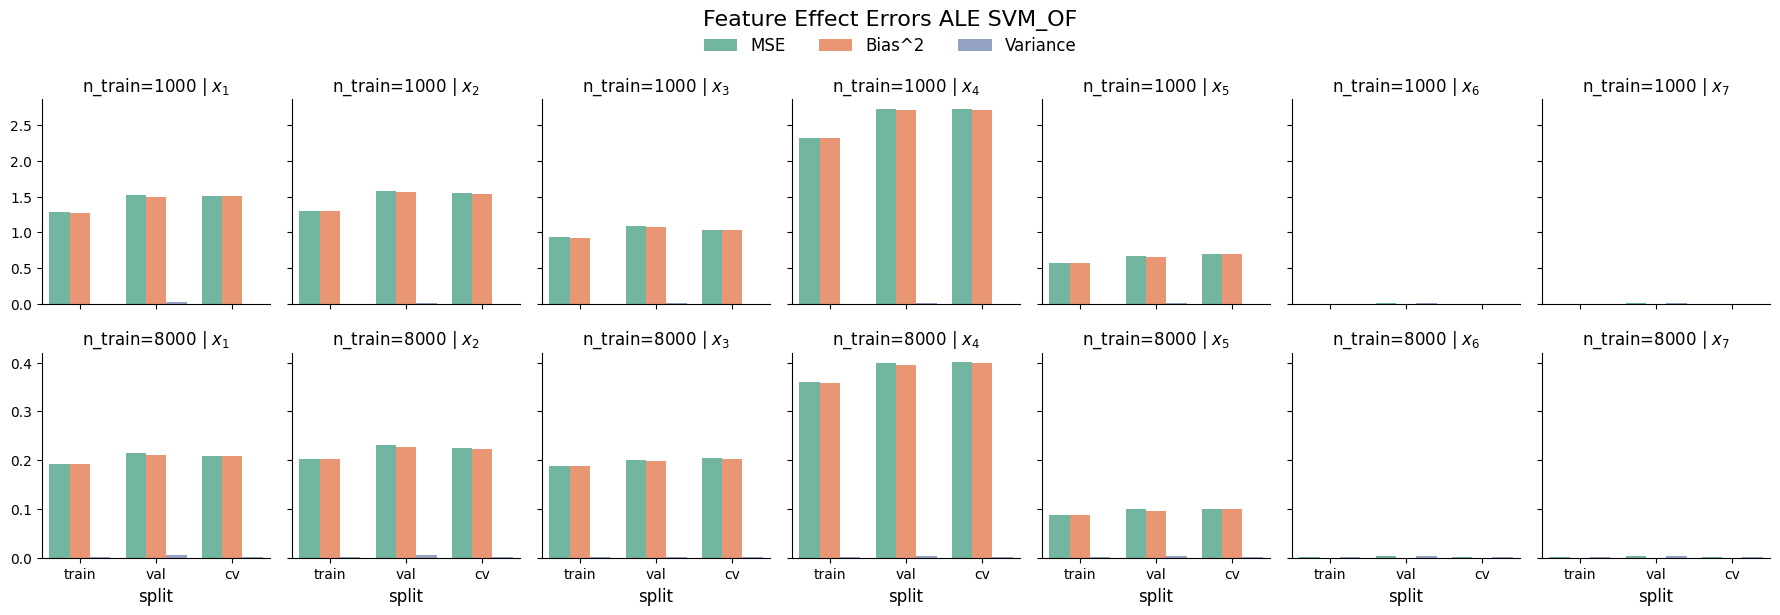

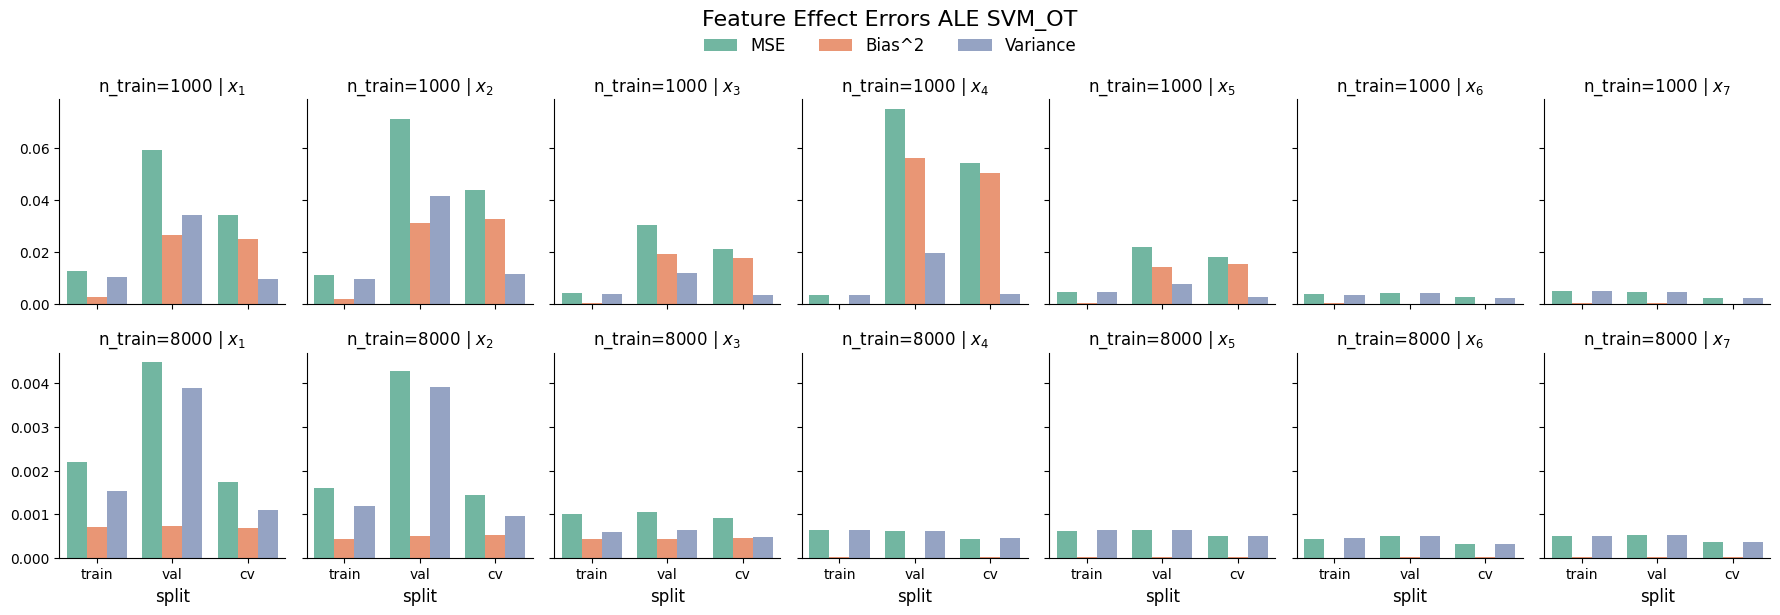

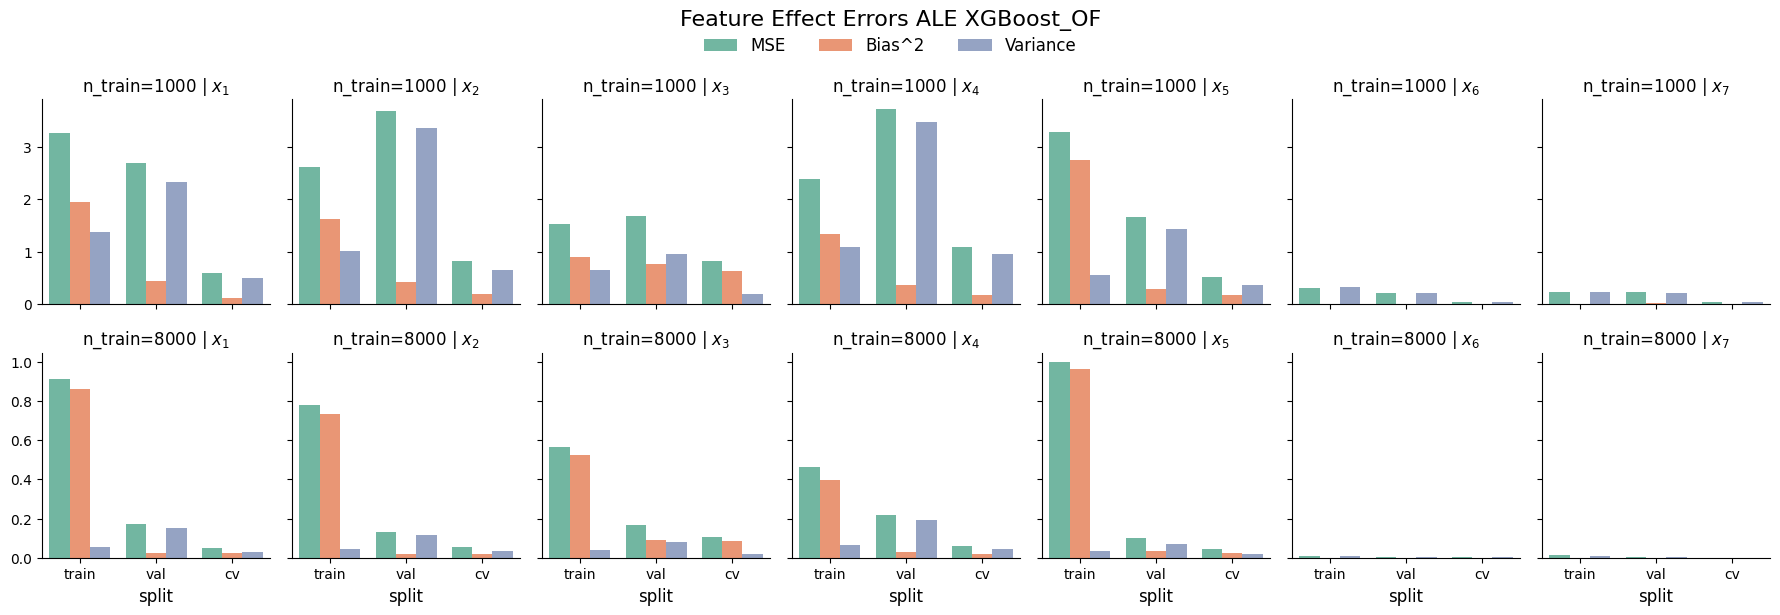

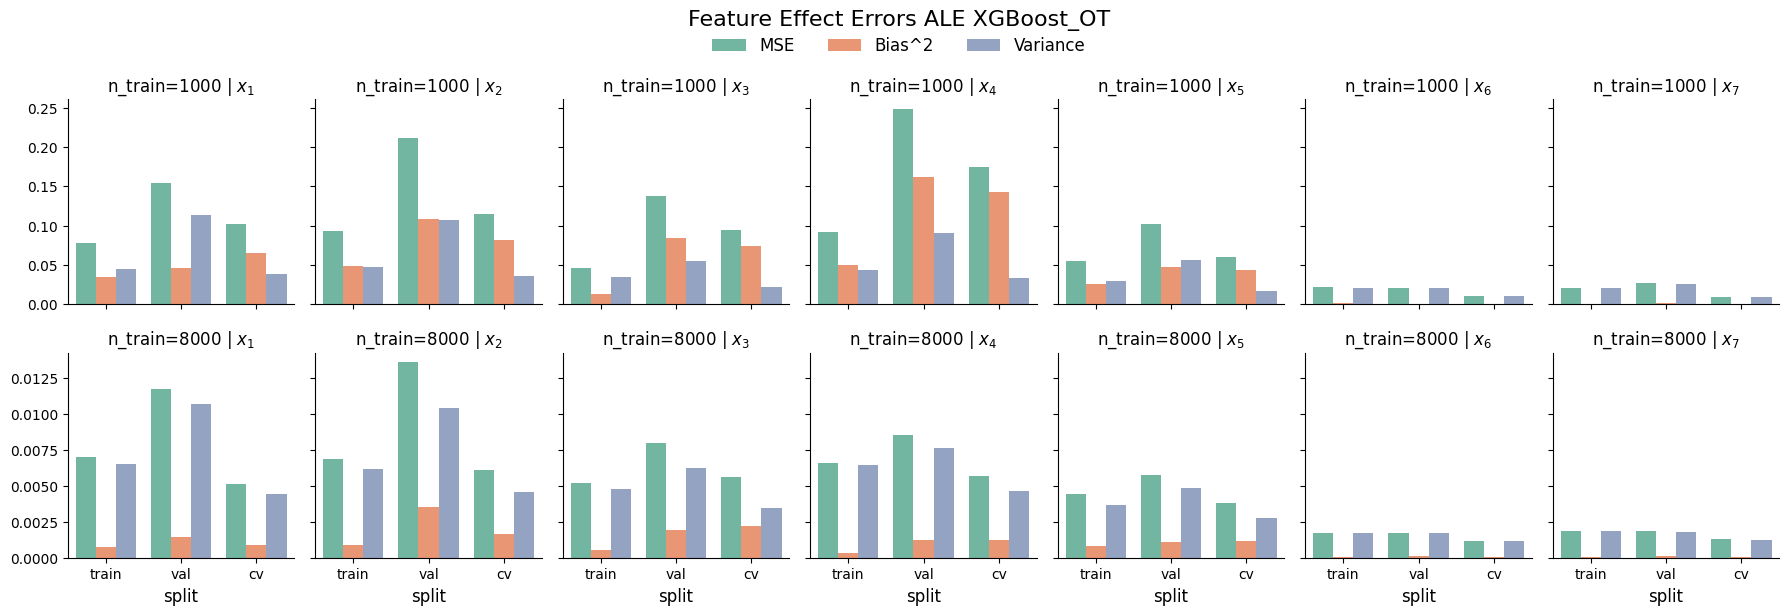

In [14]:
plot_feature_effect_error_table(
    df_fr1_ale,
    models=["LinReg", "GAM_OF", "GAM_OT", "SVM_OF", "SVM_OT", "XGBoost_OF", "XGBoost_OT"],
    type="ale",
    # save_figs=Path("../paper/img/Friedman1-all/"),
    # large_font=True,
    # show_title=False,
)

## FeynmanI.29.16

### PDP

In [15]:
df_fmn_pdp = pd.read_sql_table("pdp_results", f"sqlite:///{EXPERIMENT_PATH}/FeynmanI.29.16/{effects_results_storage}")

In [16]:
df_fmn_pdp_ = format_dataframe(df_fmn_pdp)
df_fmn_pdp_ = df_fmn_pdp_.reindex(
    columns=pd.MultiIndex.from_product(
        [["x_1", "x_2", "theta_1", "theta_2", "d_1", "d_2"], df_fmn_pdp_.columns.get_level_values(1).unique()]
    )
)
df_fmn_pdp_.style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}")

In [17]:
# ---- for paper ----
mask = (~df_fmn_pdp["feature"].isin(["x_2", "theta_2", "d_2"])) & (df_fmn_pdp["model"] != "LinReg")
format_dataframe(df_fmn_pdp[mask]).reindex(
    columns=pd.MultiIndex.from_product(
        [["x_1", "theta_1", "d_1"], df_fmn_pdp_.columns.get_level_values(1).unique()]
    )
).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}").to_latex("tab/fmn_pdp_results_table.tex", convert_css=True)

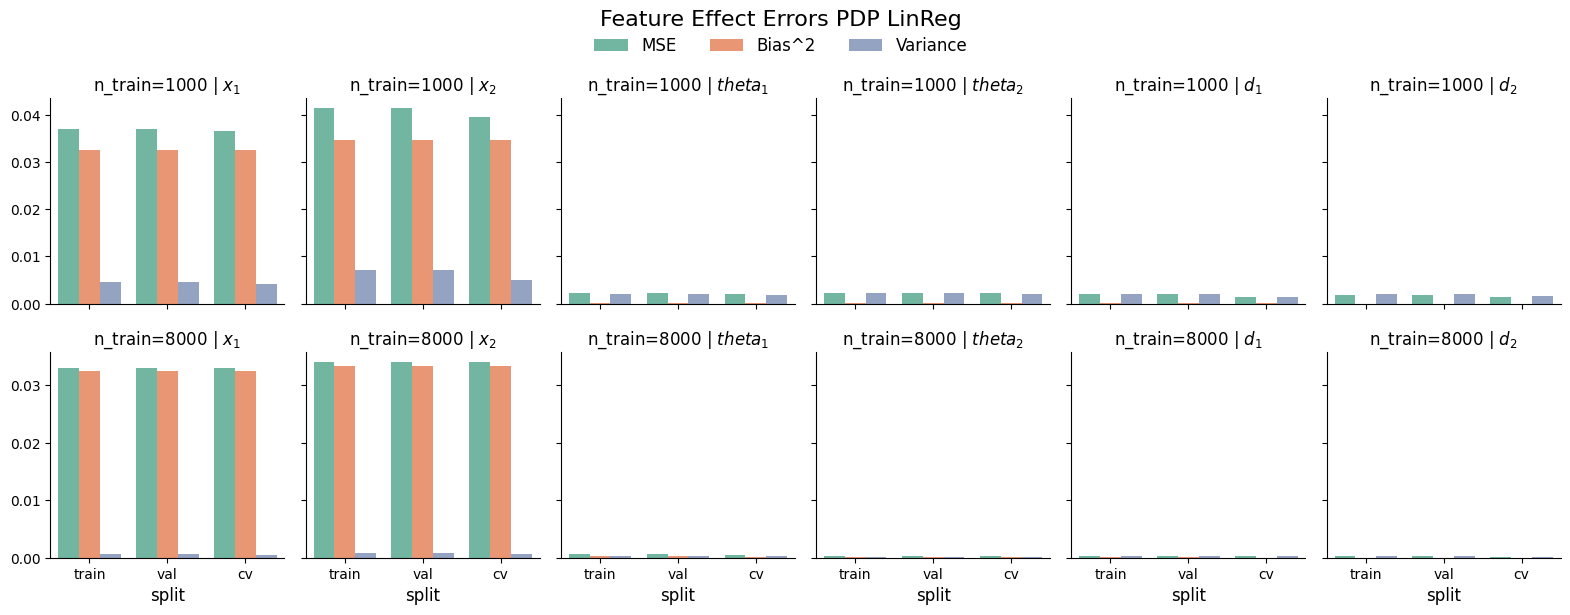

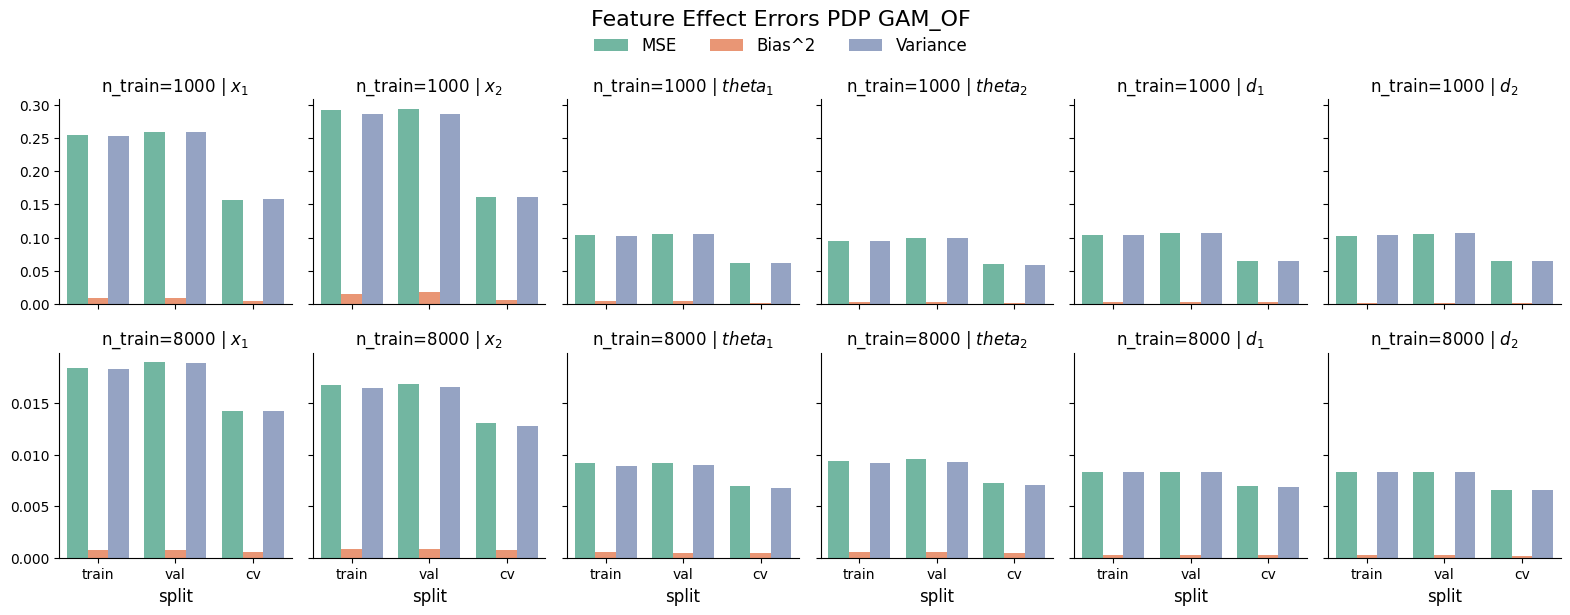

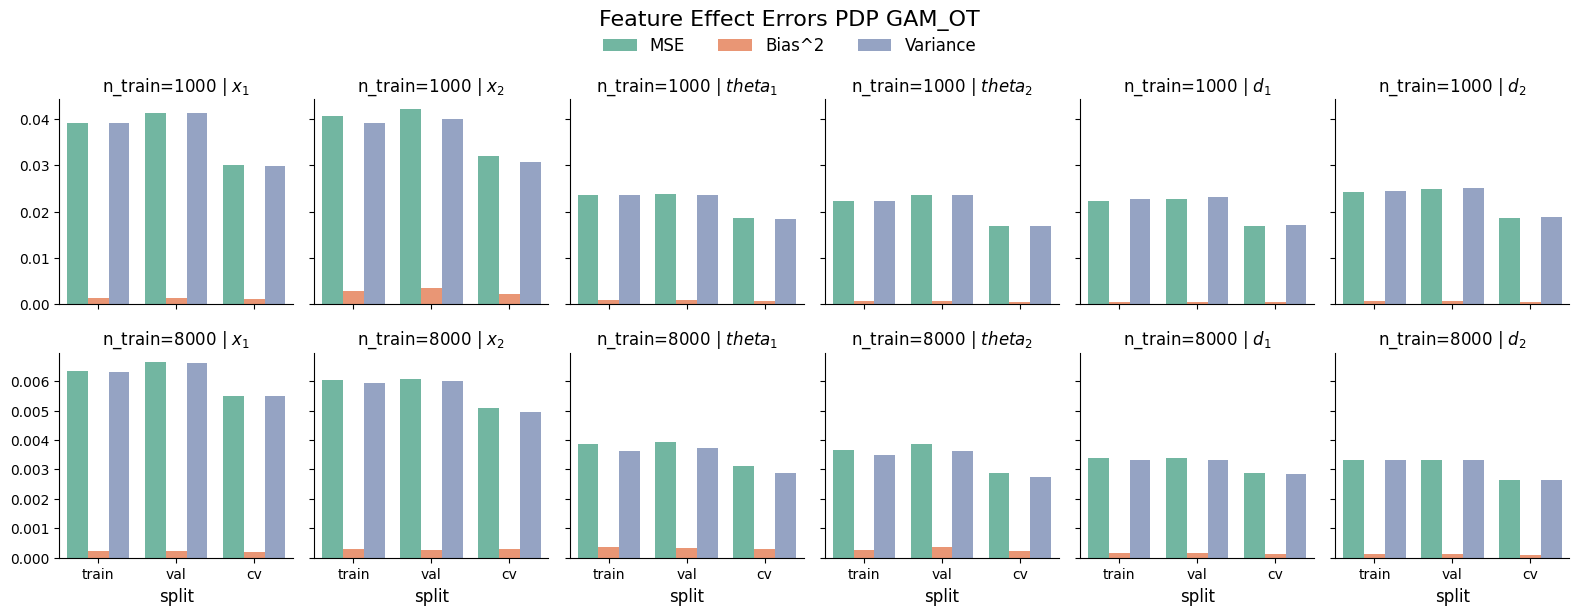

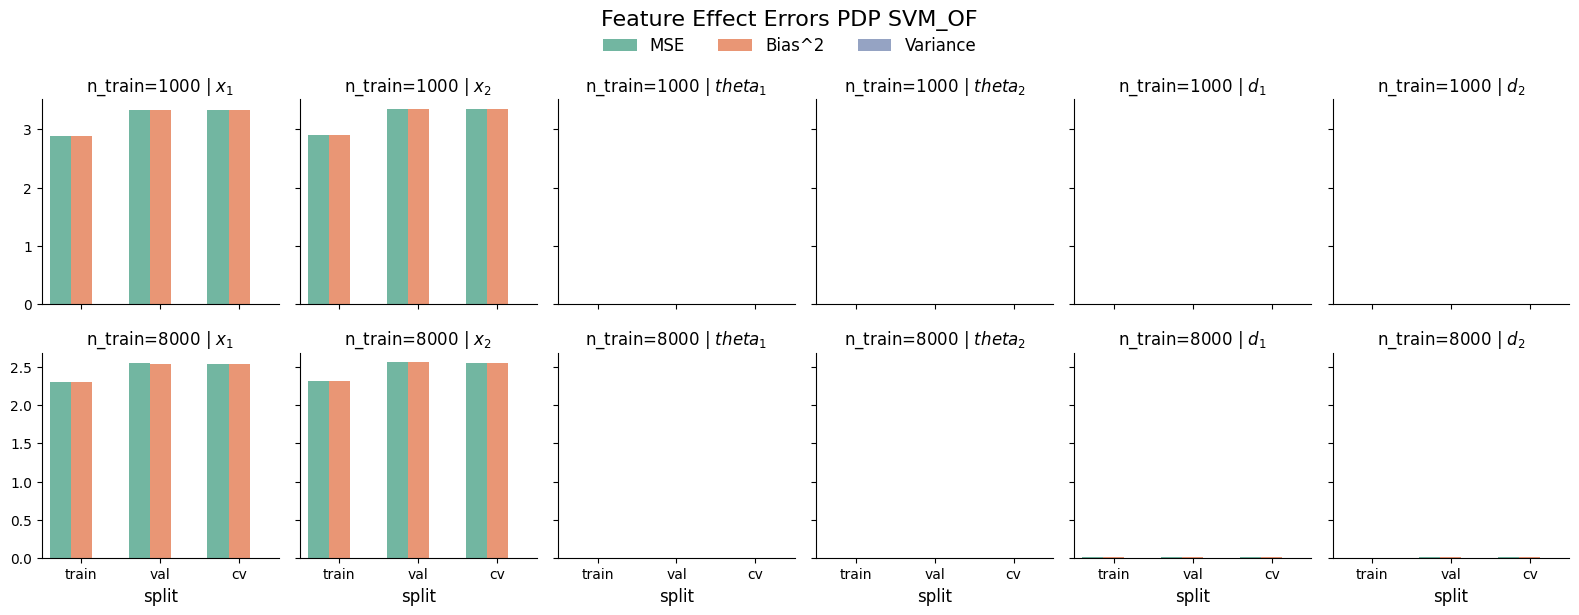

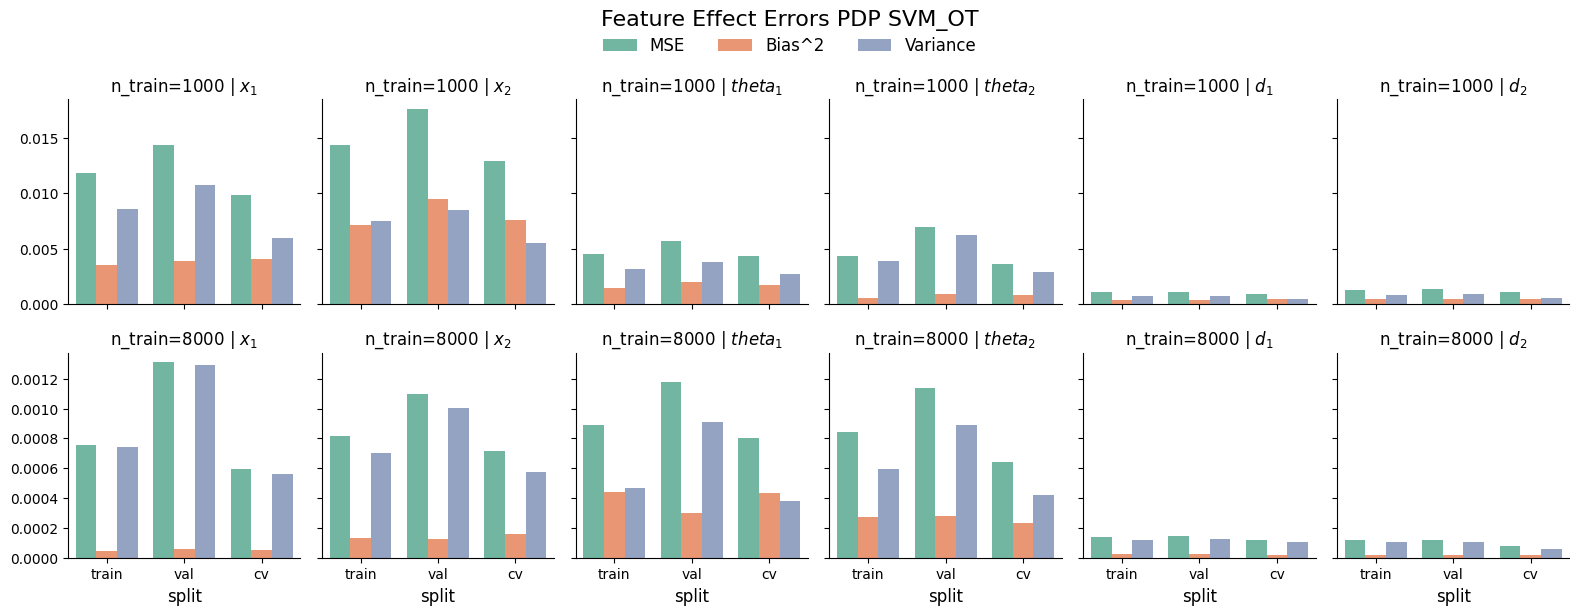

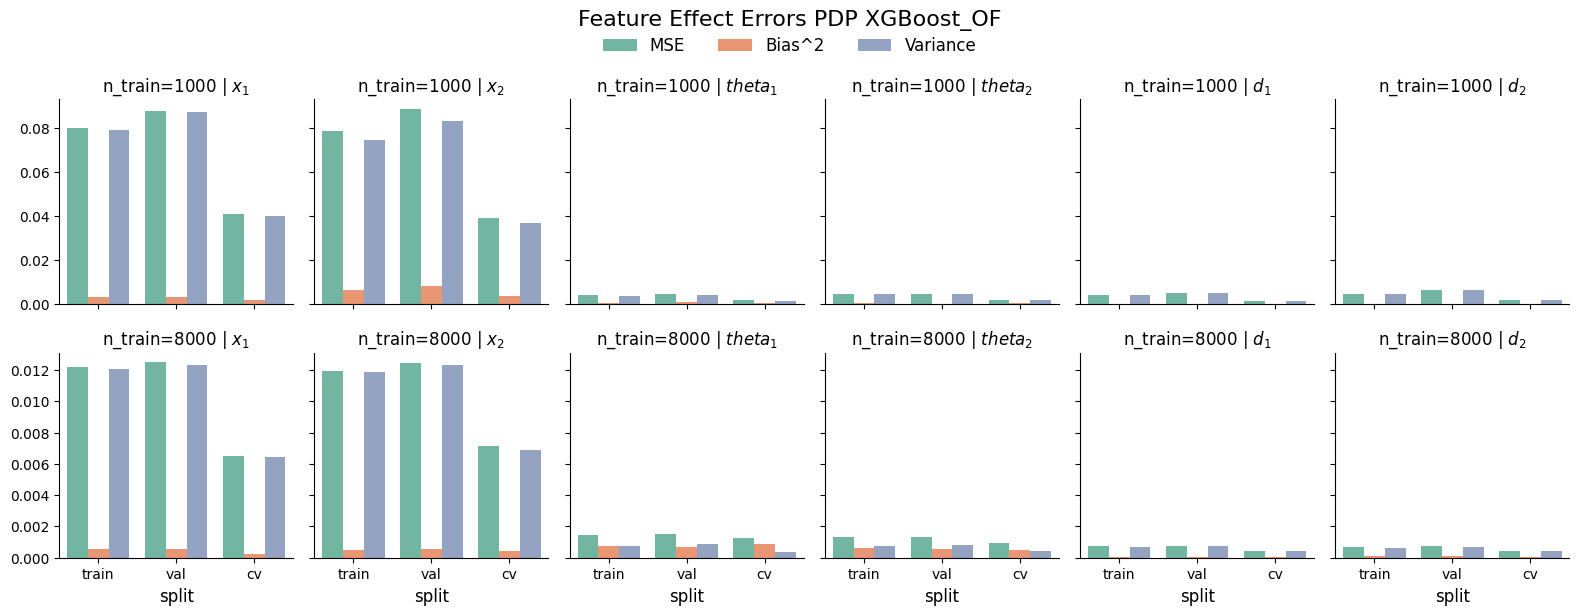

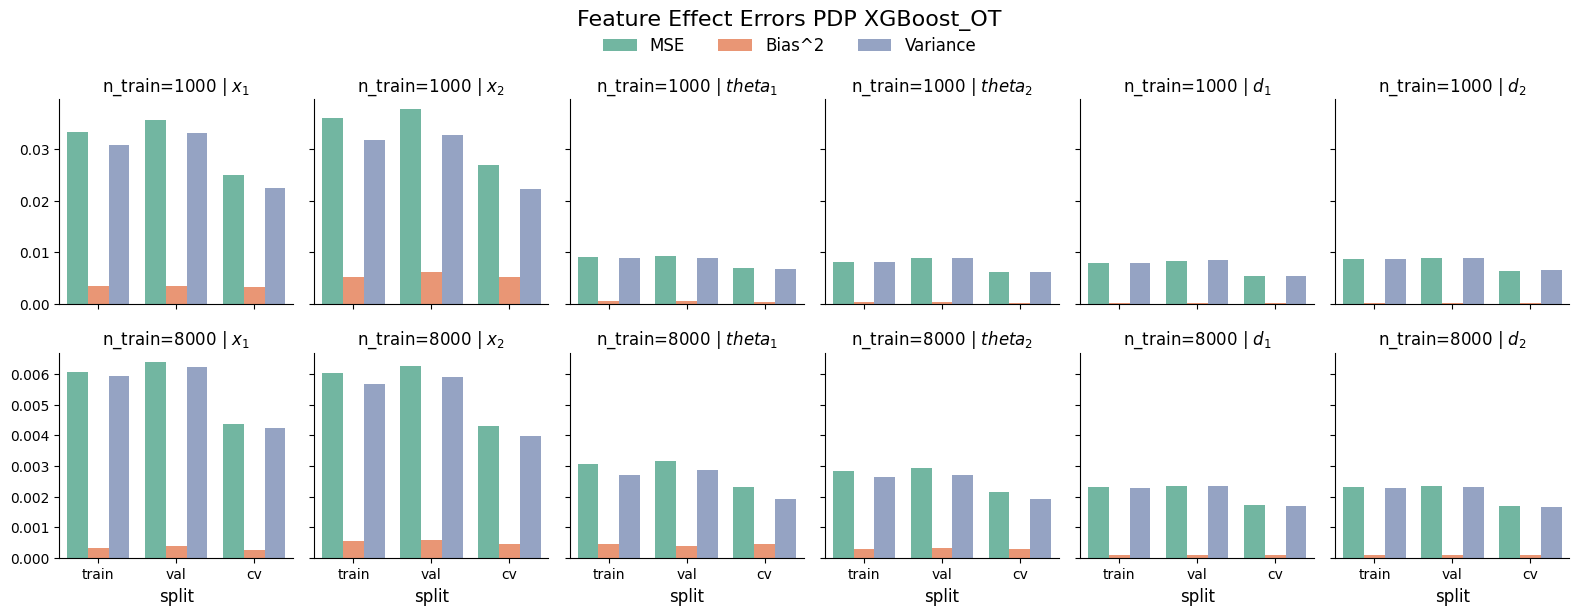

In [18]:
plot_feature_effect_error_table(
    df_fmn_pdp,
    models=["LinReg", "GAM_OF", "GAM_OT", "SVM_OF", "SVM_OT", "XGBoost_OF", "XGBoost_OT"],
    type="pdp",
    # save_figs=Path("../paper/img/FeynmanI.29.16-all/"),
    # large_font=True,
    # show_title=False,
)

### ALE

In [19]:
df_fmn_ale = pd.read_sql_table("ale_results", f"sqlite:///{EXPERIMENT_PATH}/FeynmanI.29.16/{effects_results_storage}")
df_fmn_ale_ = format_dataframe(df_fmn_ale)
df_fmn_ale_ = df_fmn_ale_.reindex(
    columns=pd.MultiIndex.from_product(
        [["x_1", "x_2", "theta_1", "theta_2", "d_1", "d_2"], df_fmn_ale_.columns.get_level_values(1).unique()]
    )
)
df_fmn_ale_.style.apply(highlight_min_feature_metric, axis=None).format("{:.6f}")

In [20]:
# ---- for paper ----
mask = (~df_fmn_ale["feature"].isin(["x_2", "theta_2", "d_2"])) & (df_fmn_ale["model"] != "LinReg")
format_dataframe(df_fmn_ale[mask]).reindex(
    columns=pd.MultiIndex.from_product(
        [["x_1", "theta_1", "d_1"], df_fmn_ale_.columns.get_level_values(1).unique()]
    )
).style.apply(highlight_min_feature_metric, axis=None).format("{:.4f}").to_latex("tab/fmn_ale_results_table.tex", convert_css=True)

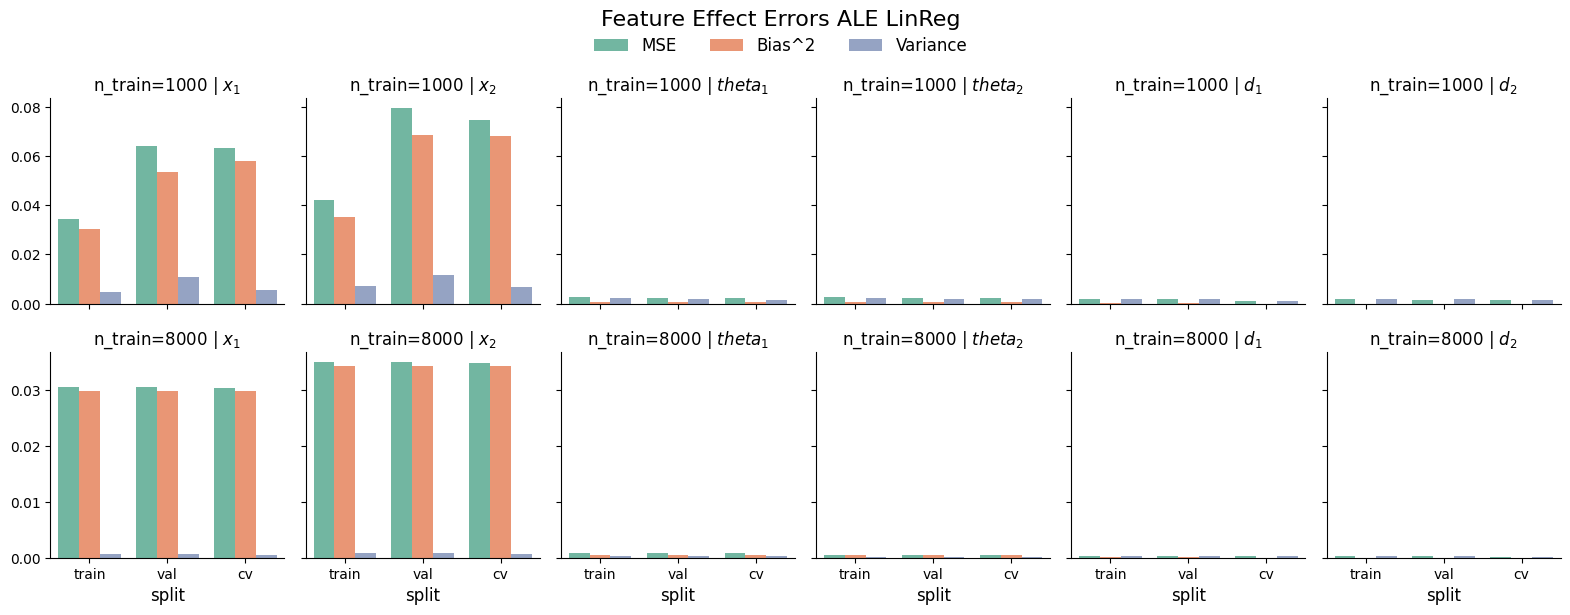

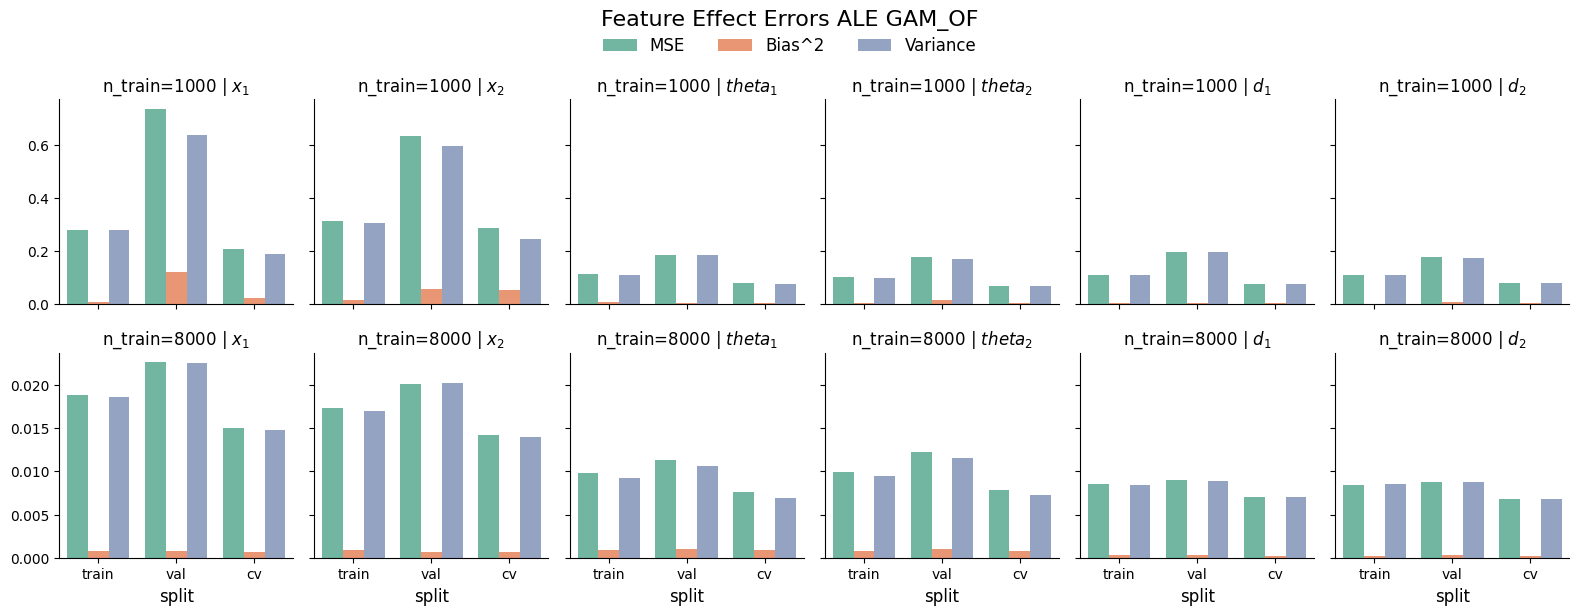

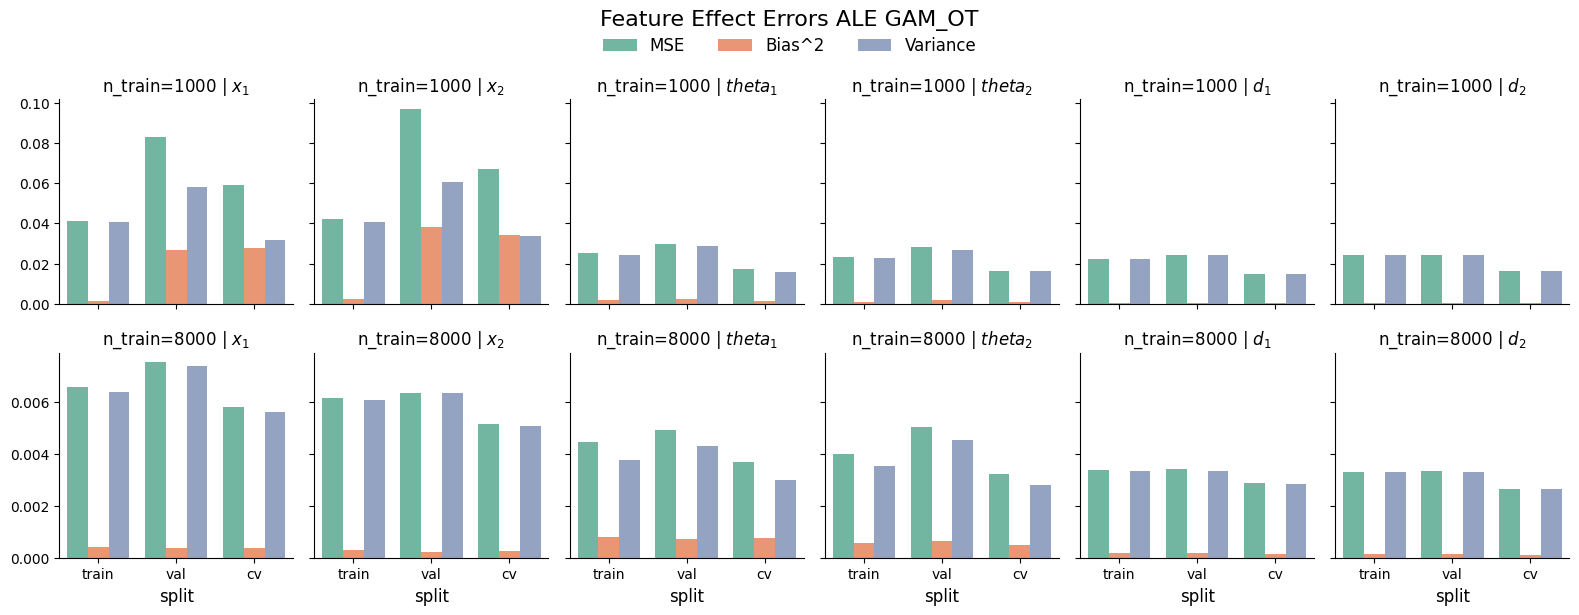

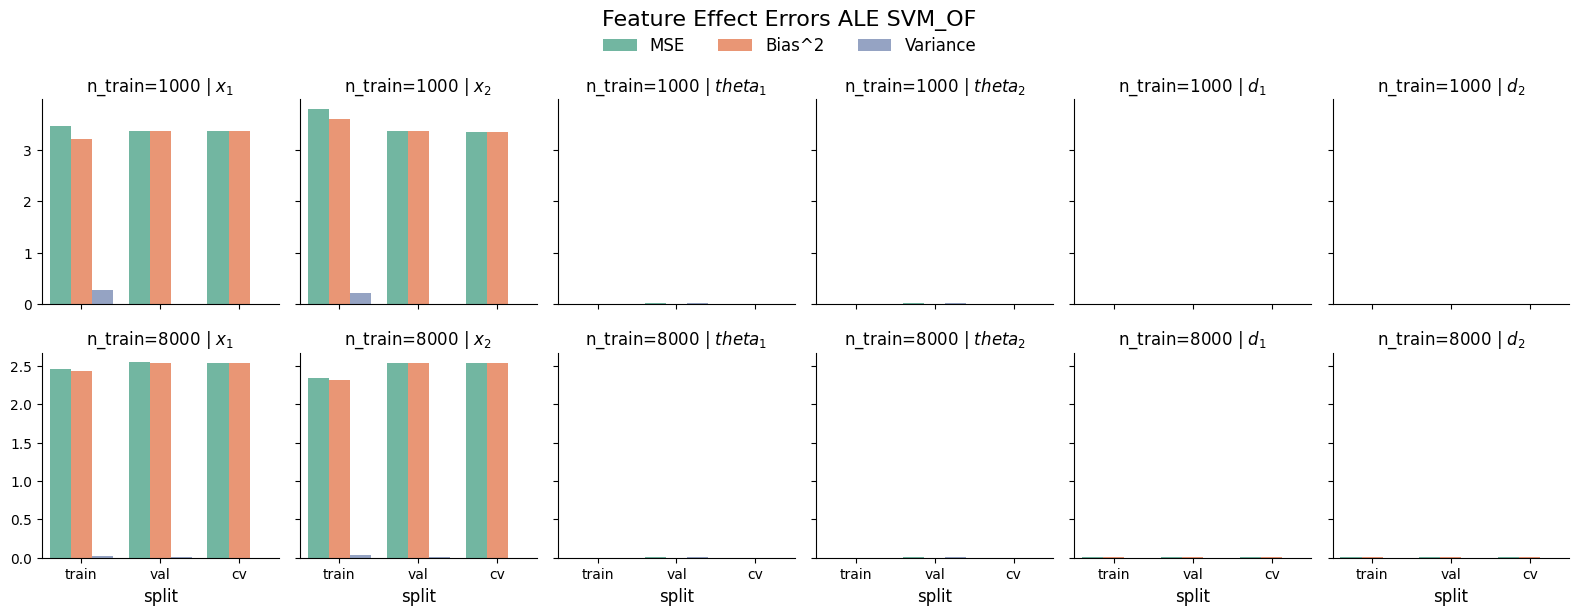

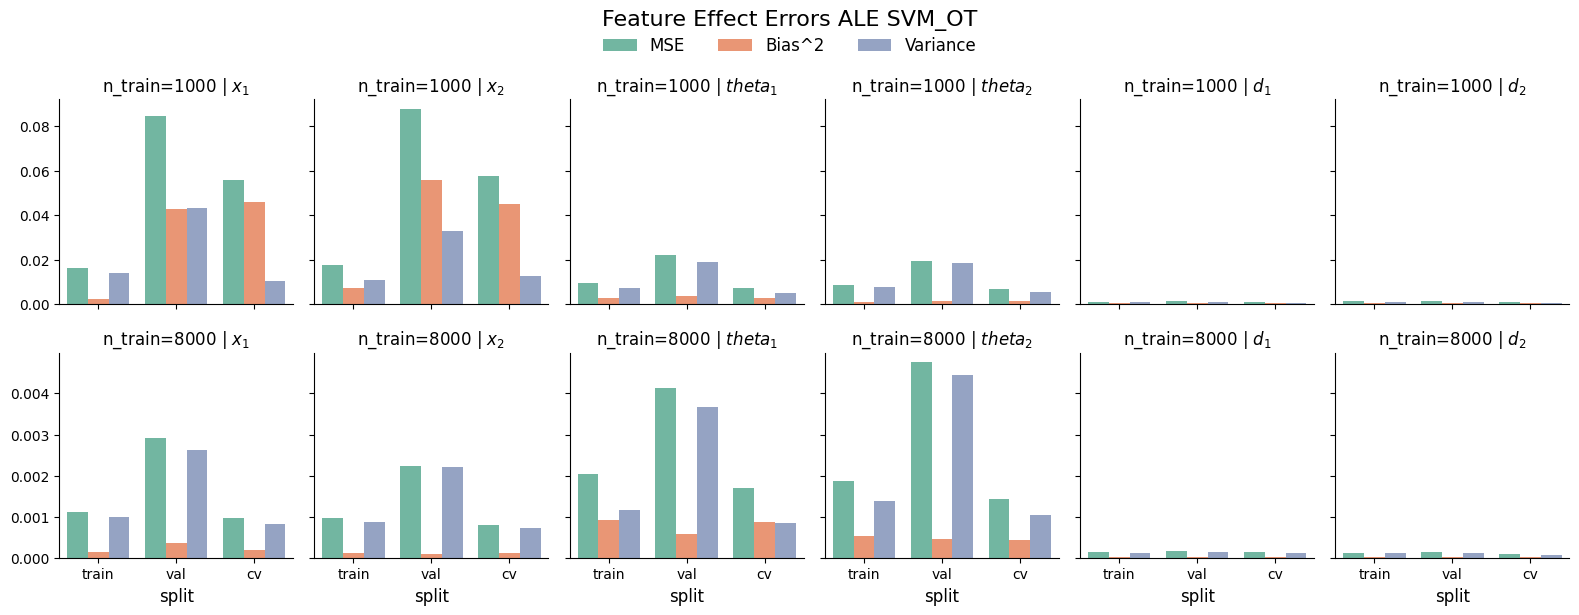

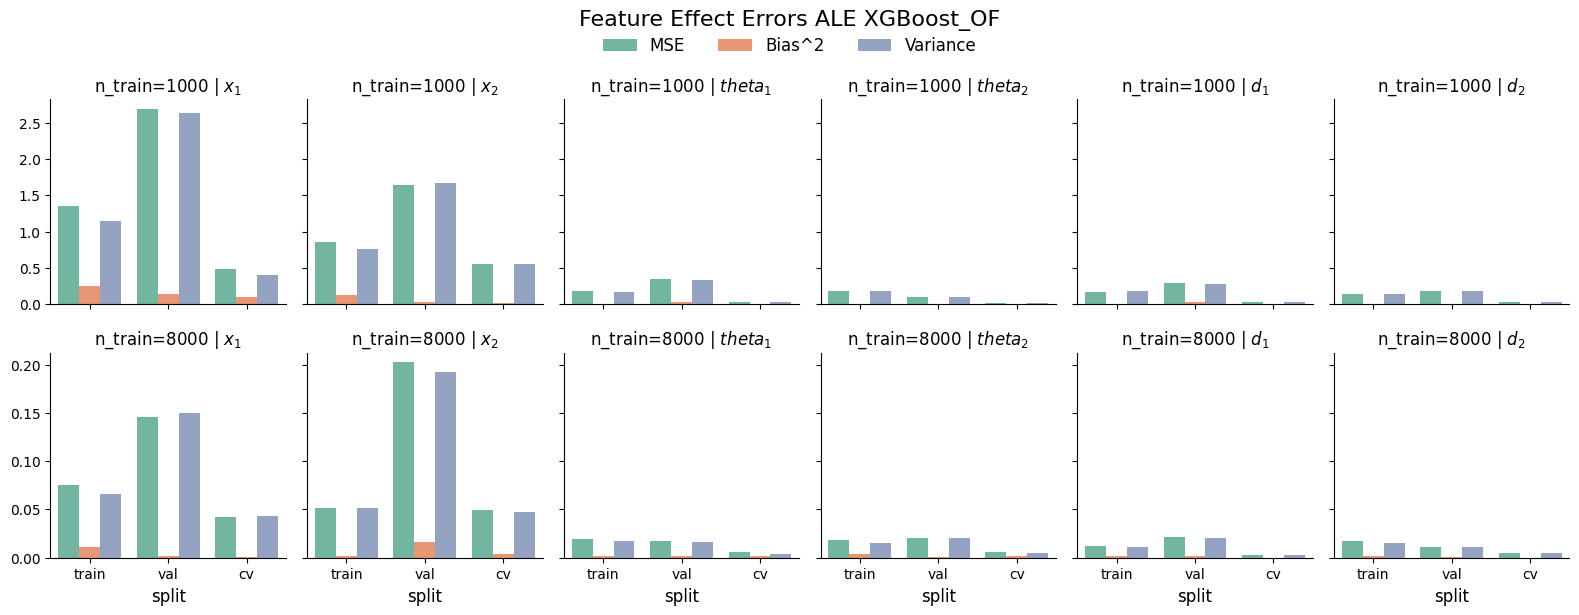

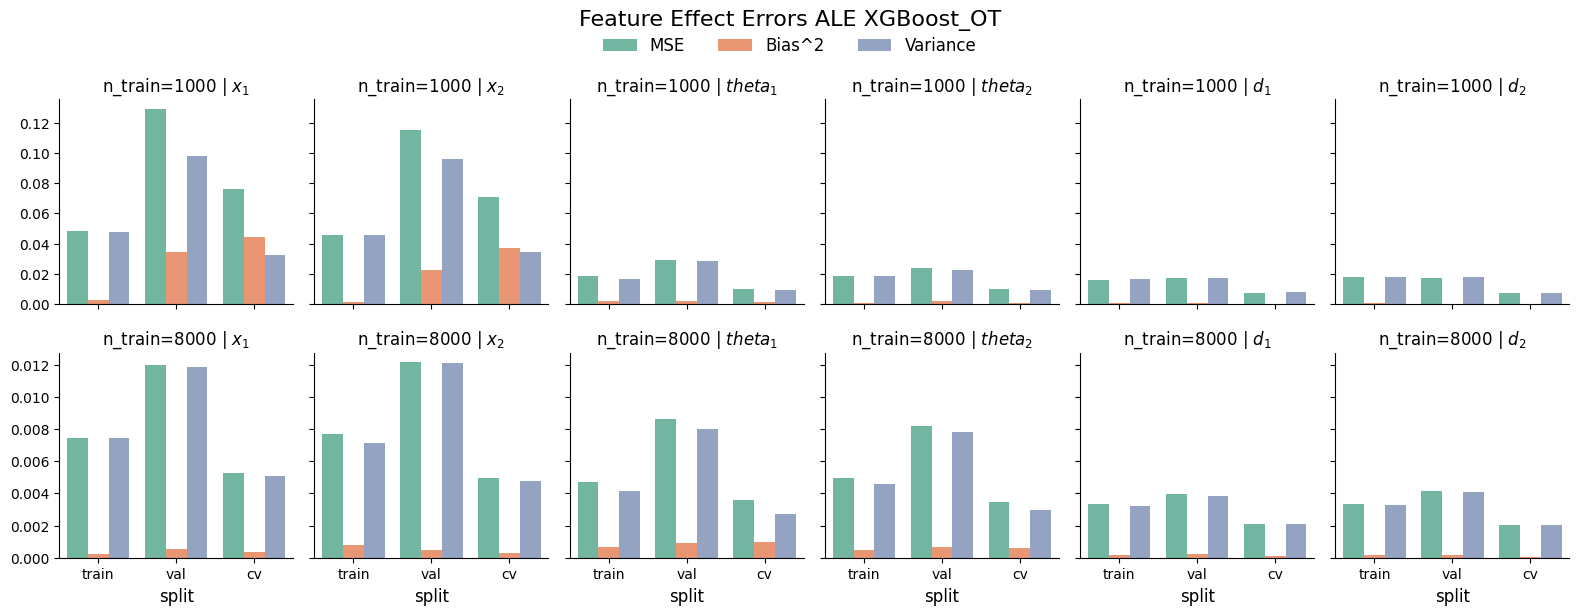

In [21]:
plot_feature_effect_error_table(
    df_fmn_ale,
    models=["LinReg", "GAM_OF", "GAM_OT", "SVM_OF", "SVM_OT", "XGBoost_OF", "XGBoost_OT"],
    type="ale",
    # save_figs=Path("../paper/img/FeynmanI.29.16-all/"),
    # large_font=True,
    # show_title=False,
)

## Deeper Insights

In [22]:
import joblib
from current_research_feature_effects.plotting.plots import plot_fe_bias_variance

### SimpleNormalCorrelated XGBoost_OF PDP 1000

In [23]:
res = joblib.load(
    "../experiments/main_study_parallel/SimpleNormalCorrelated/results/XGBoost_OF/pdp_metrics_1000.joblib"
)

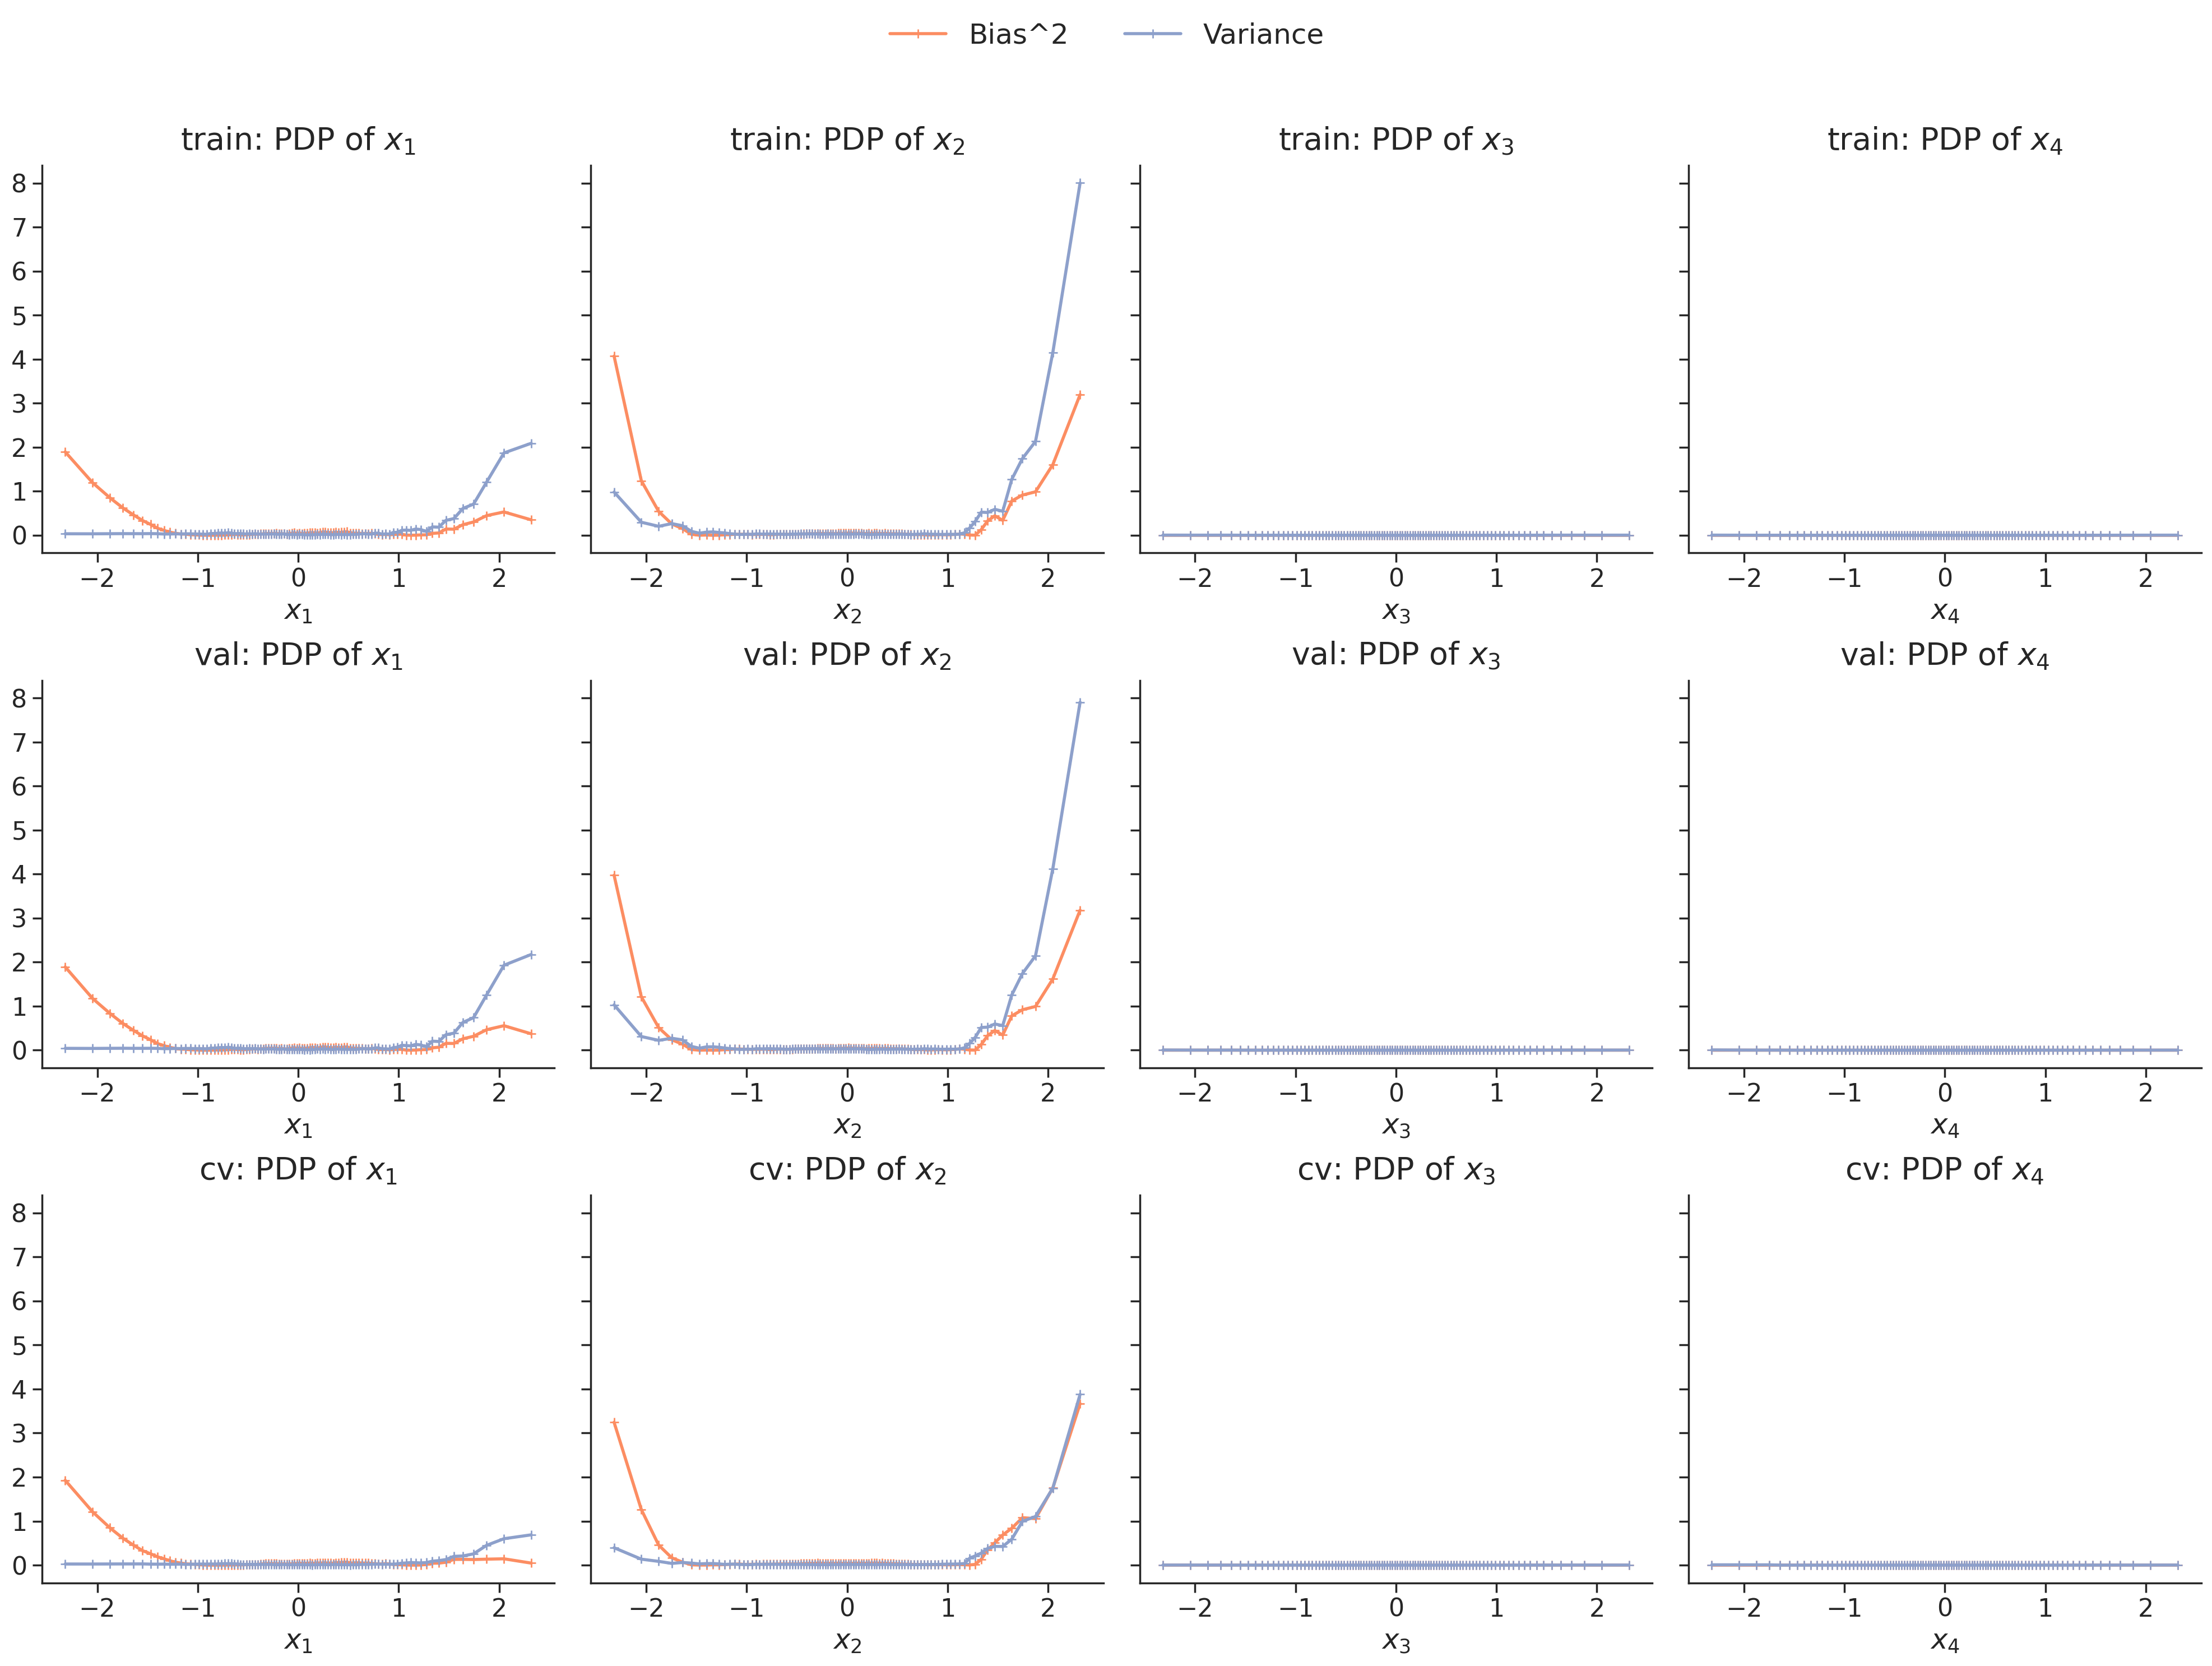

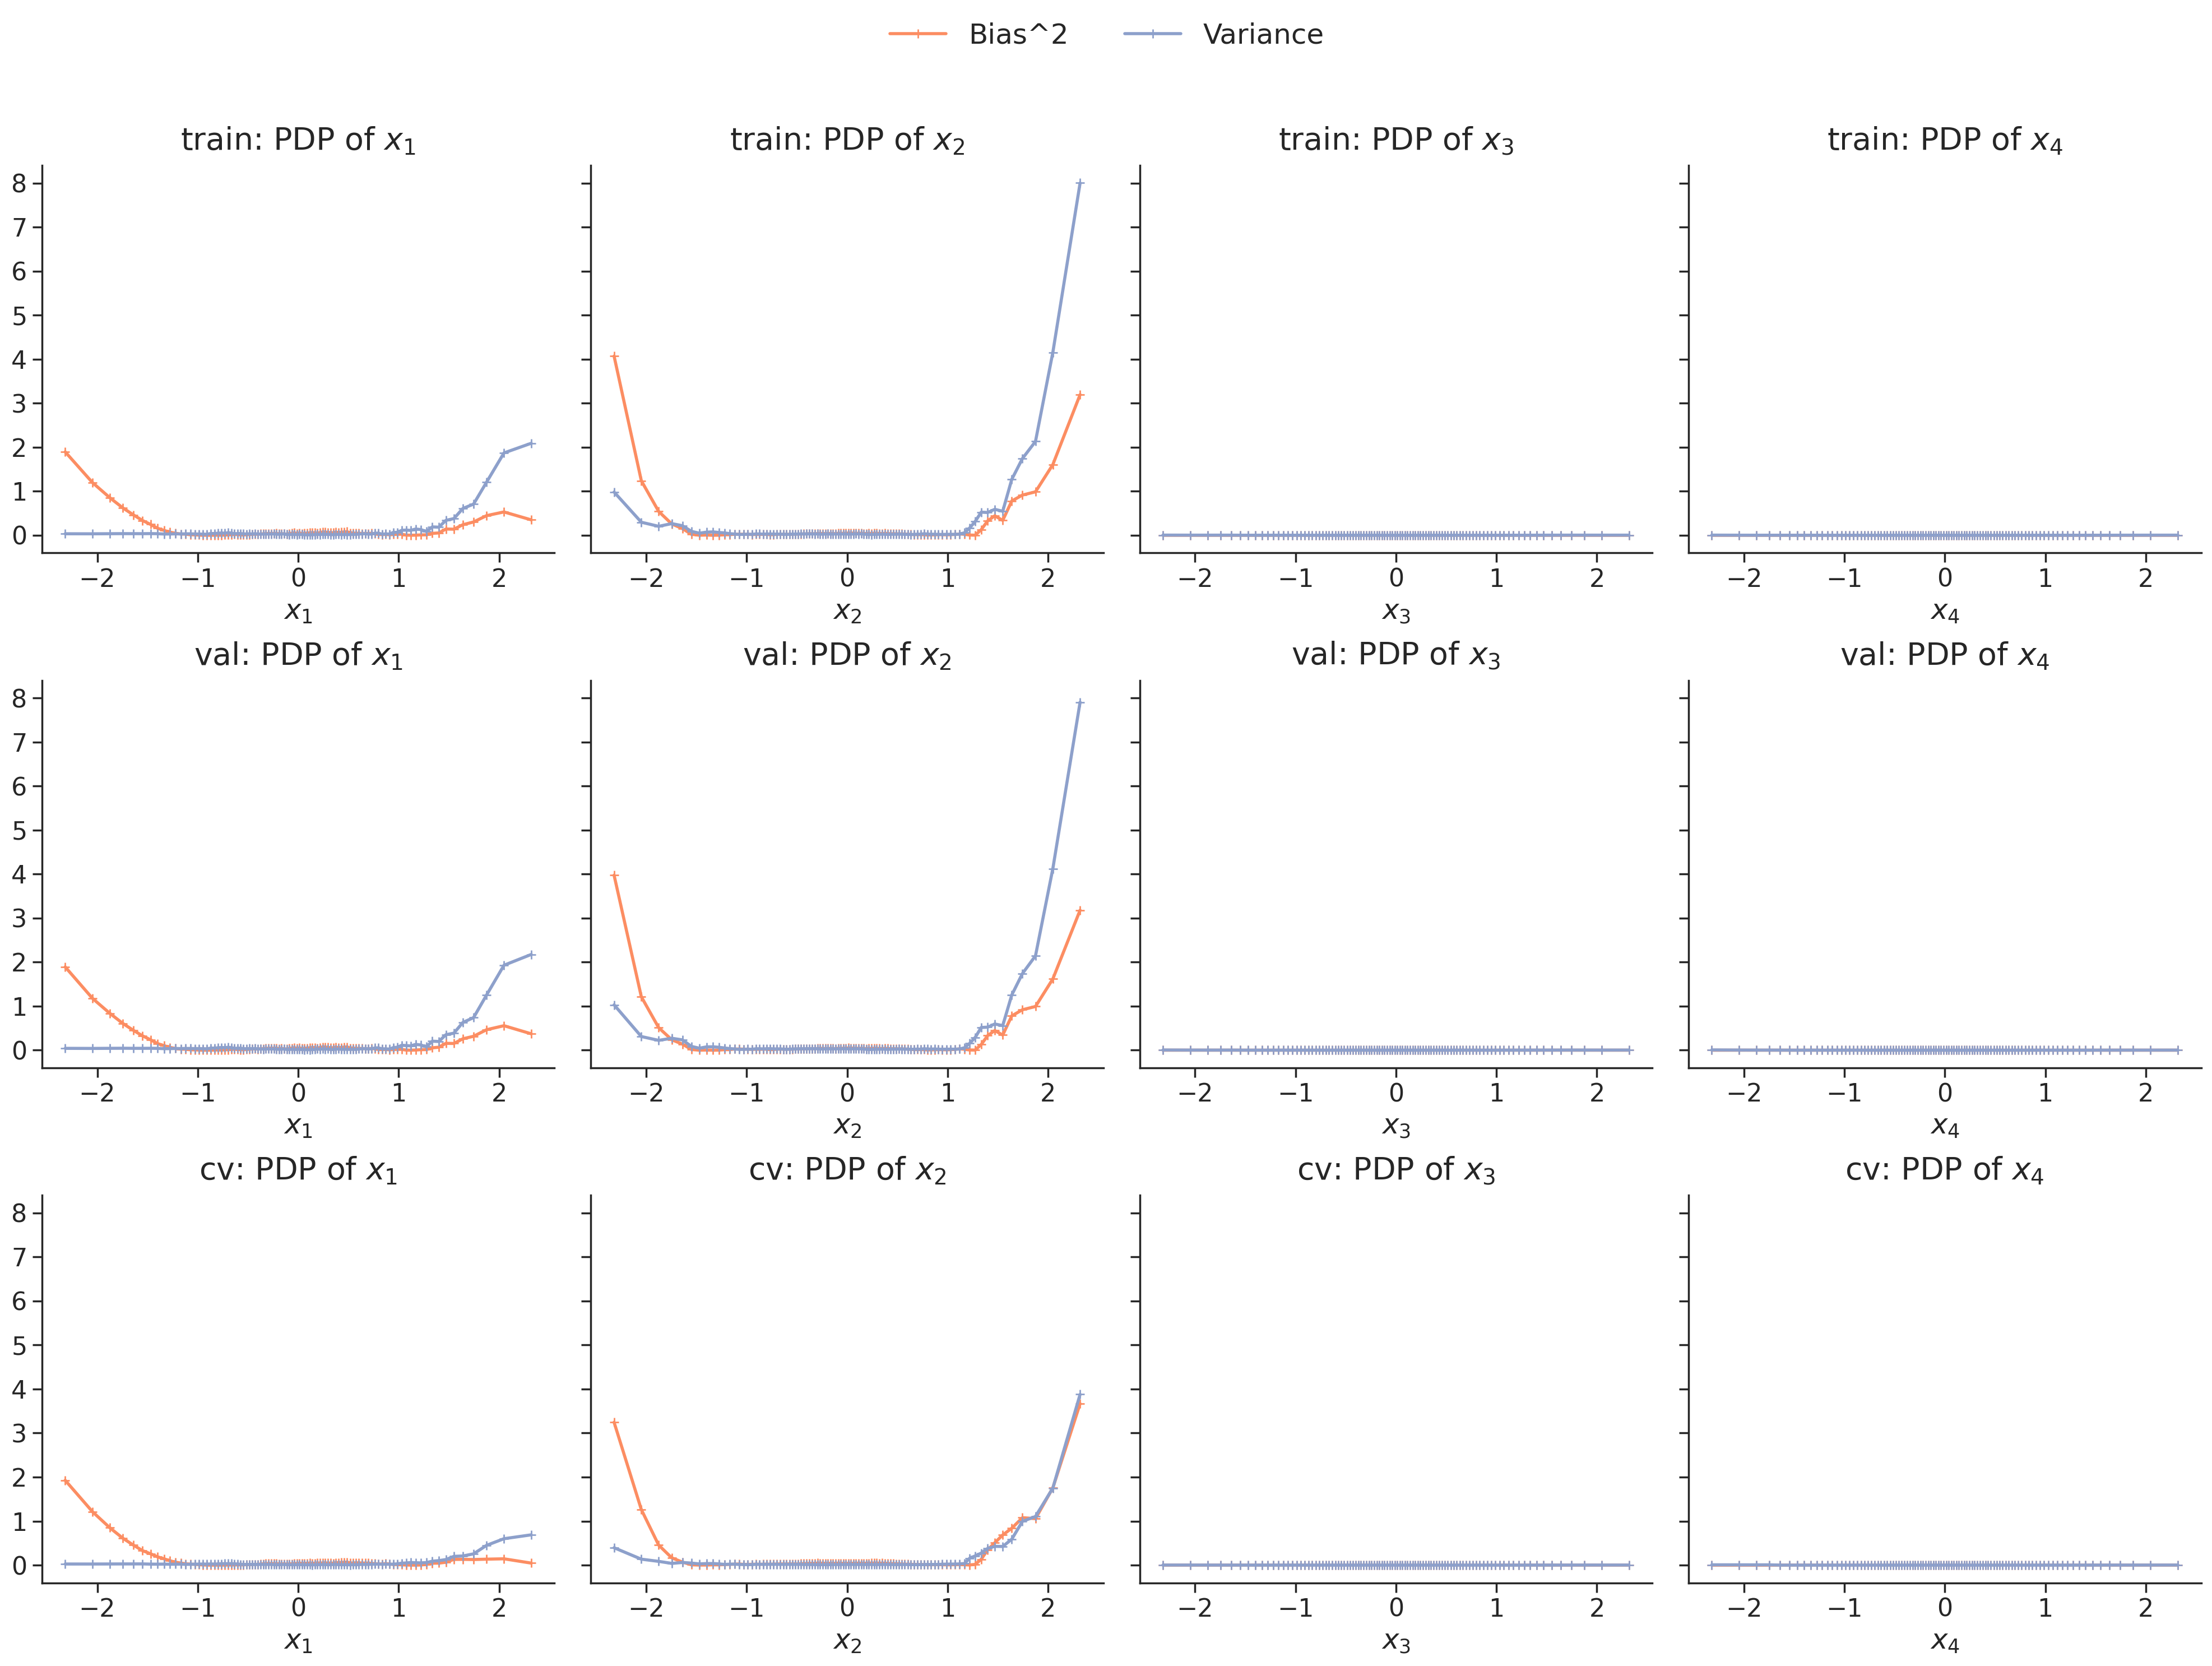

In [24]:
plot_fe_bias_variance(res, large_font=True)

### SimpleNormalCorrelated GAM_OF ALE 1000

In [25]:
res2 = joblib.load("../experiments/main_study_parallel/SimpleNormalCorrelated/results/GAM_OF/ale_metrics_1000.joblib")

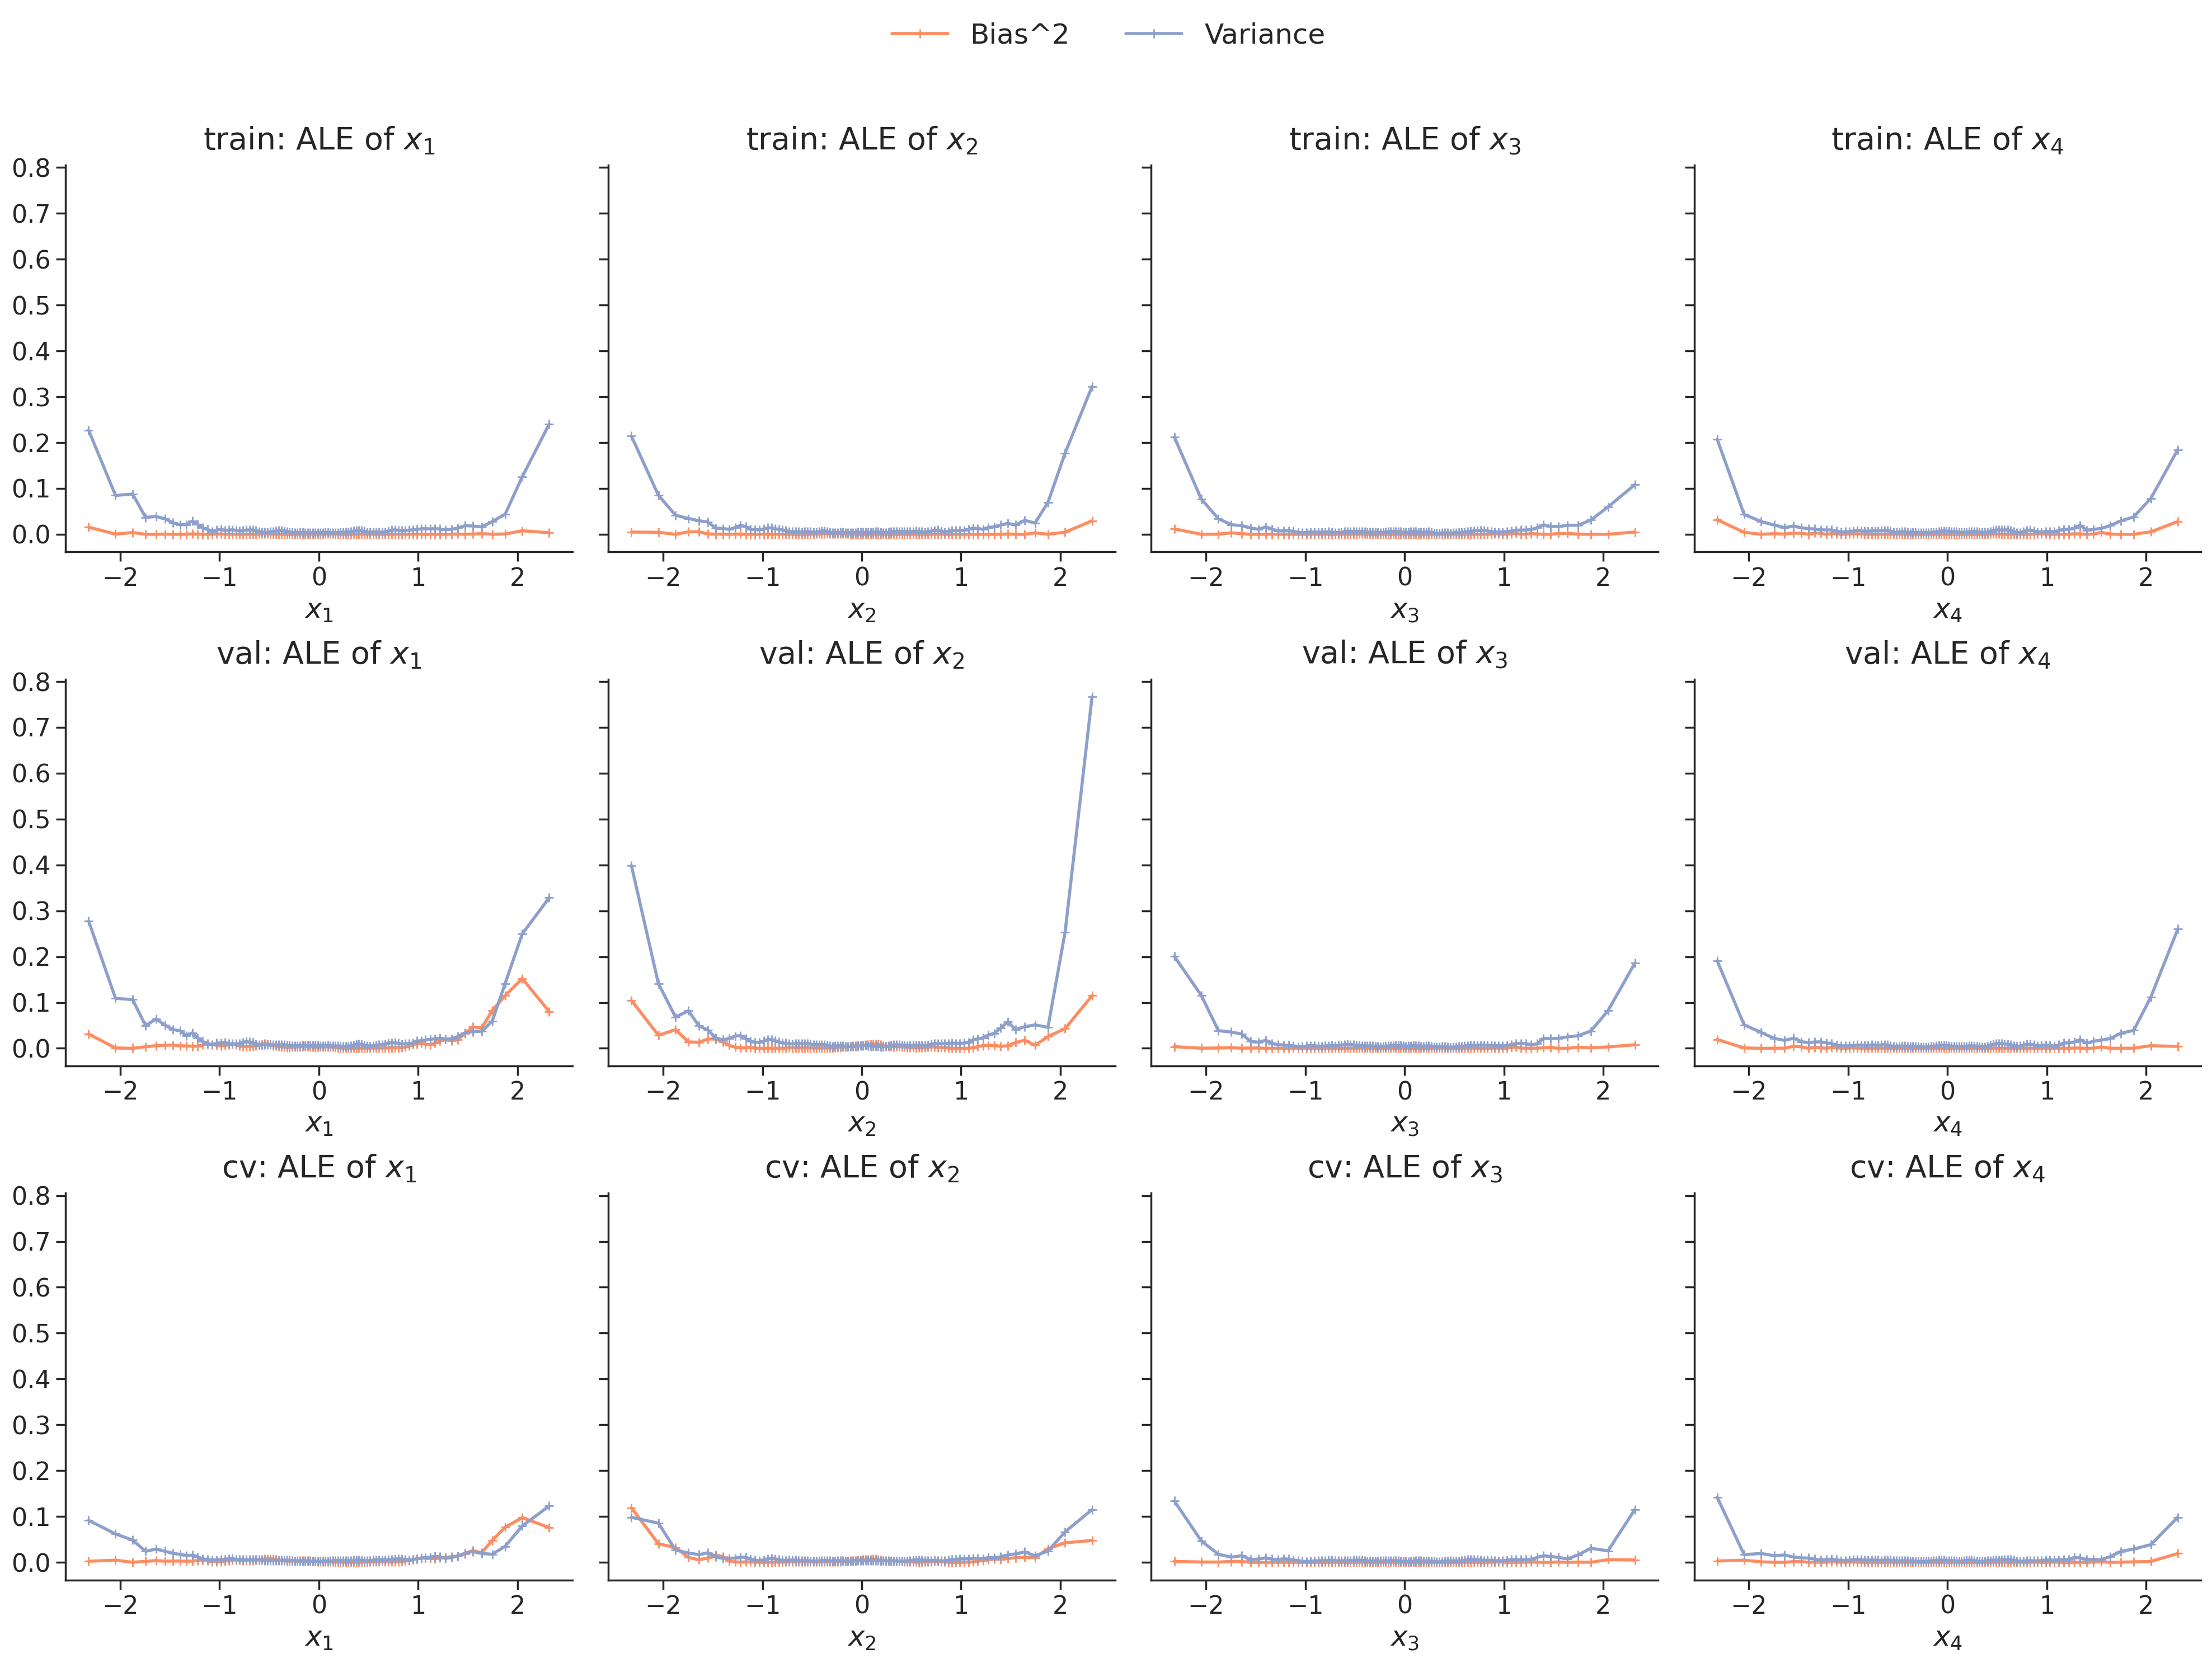

In [26]:
plot_fe_bias_variance(res2, sharey=True, large_font=True)

### Feynman SVM_OT ALE 1000

In [27]:
res3 = joblib.load("../experiments/main_study_parallel/FeynmanI.29.16/results/SVM_OT/ale_metrics_1000.joblib")

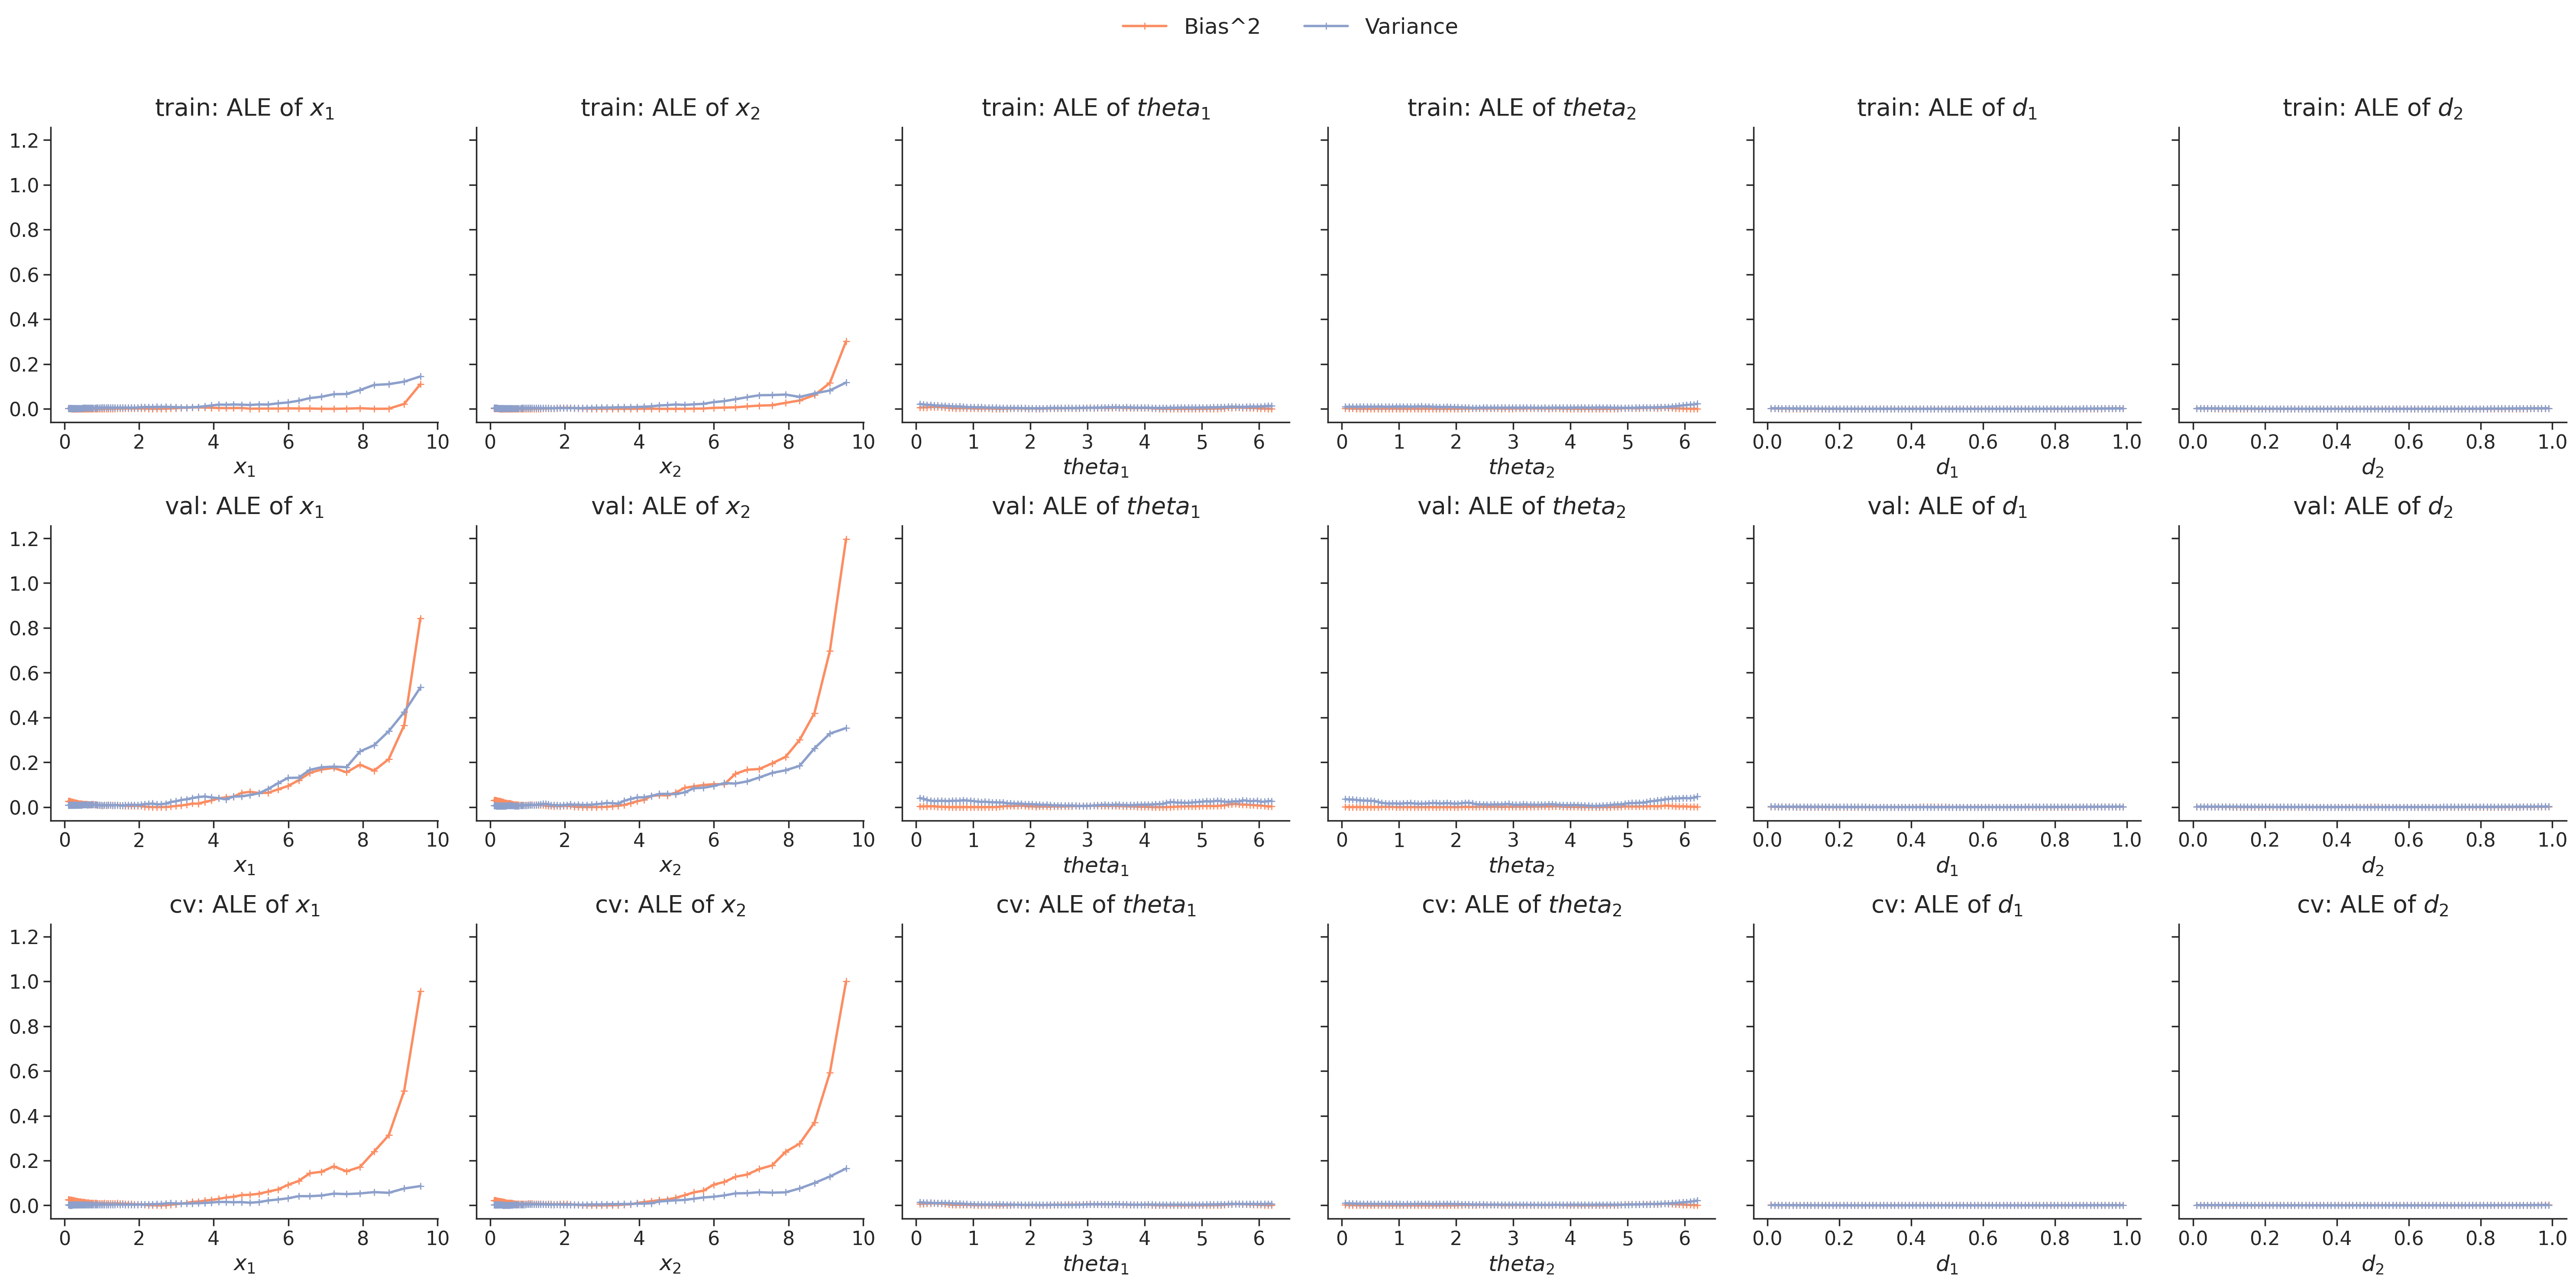

In [28]:
plot_fe_bias_variance(res3, sharey=True, large_font=True)

### SVM_OF Friedman1 PDP 8000

In [29]:
res4 = joblib.load("../experiments/main_study_parallel/Friedman1/results/SVM_OF/pdp_metrics_8000.joblib")

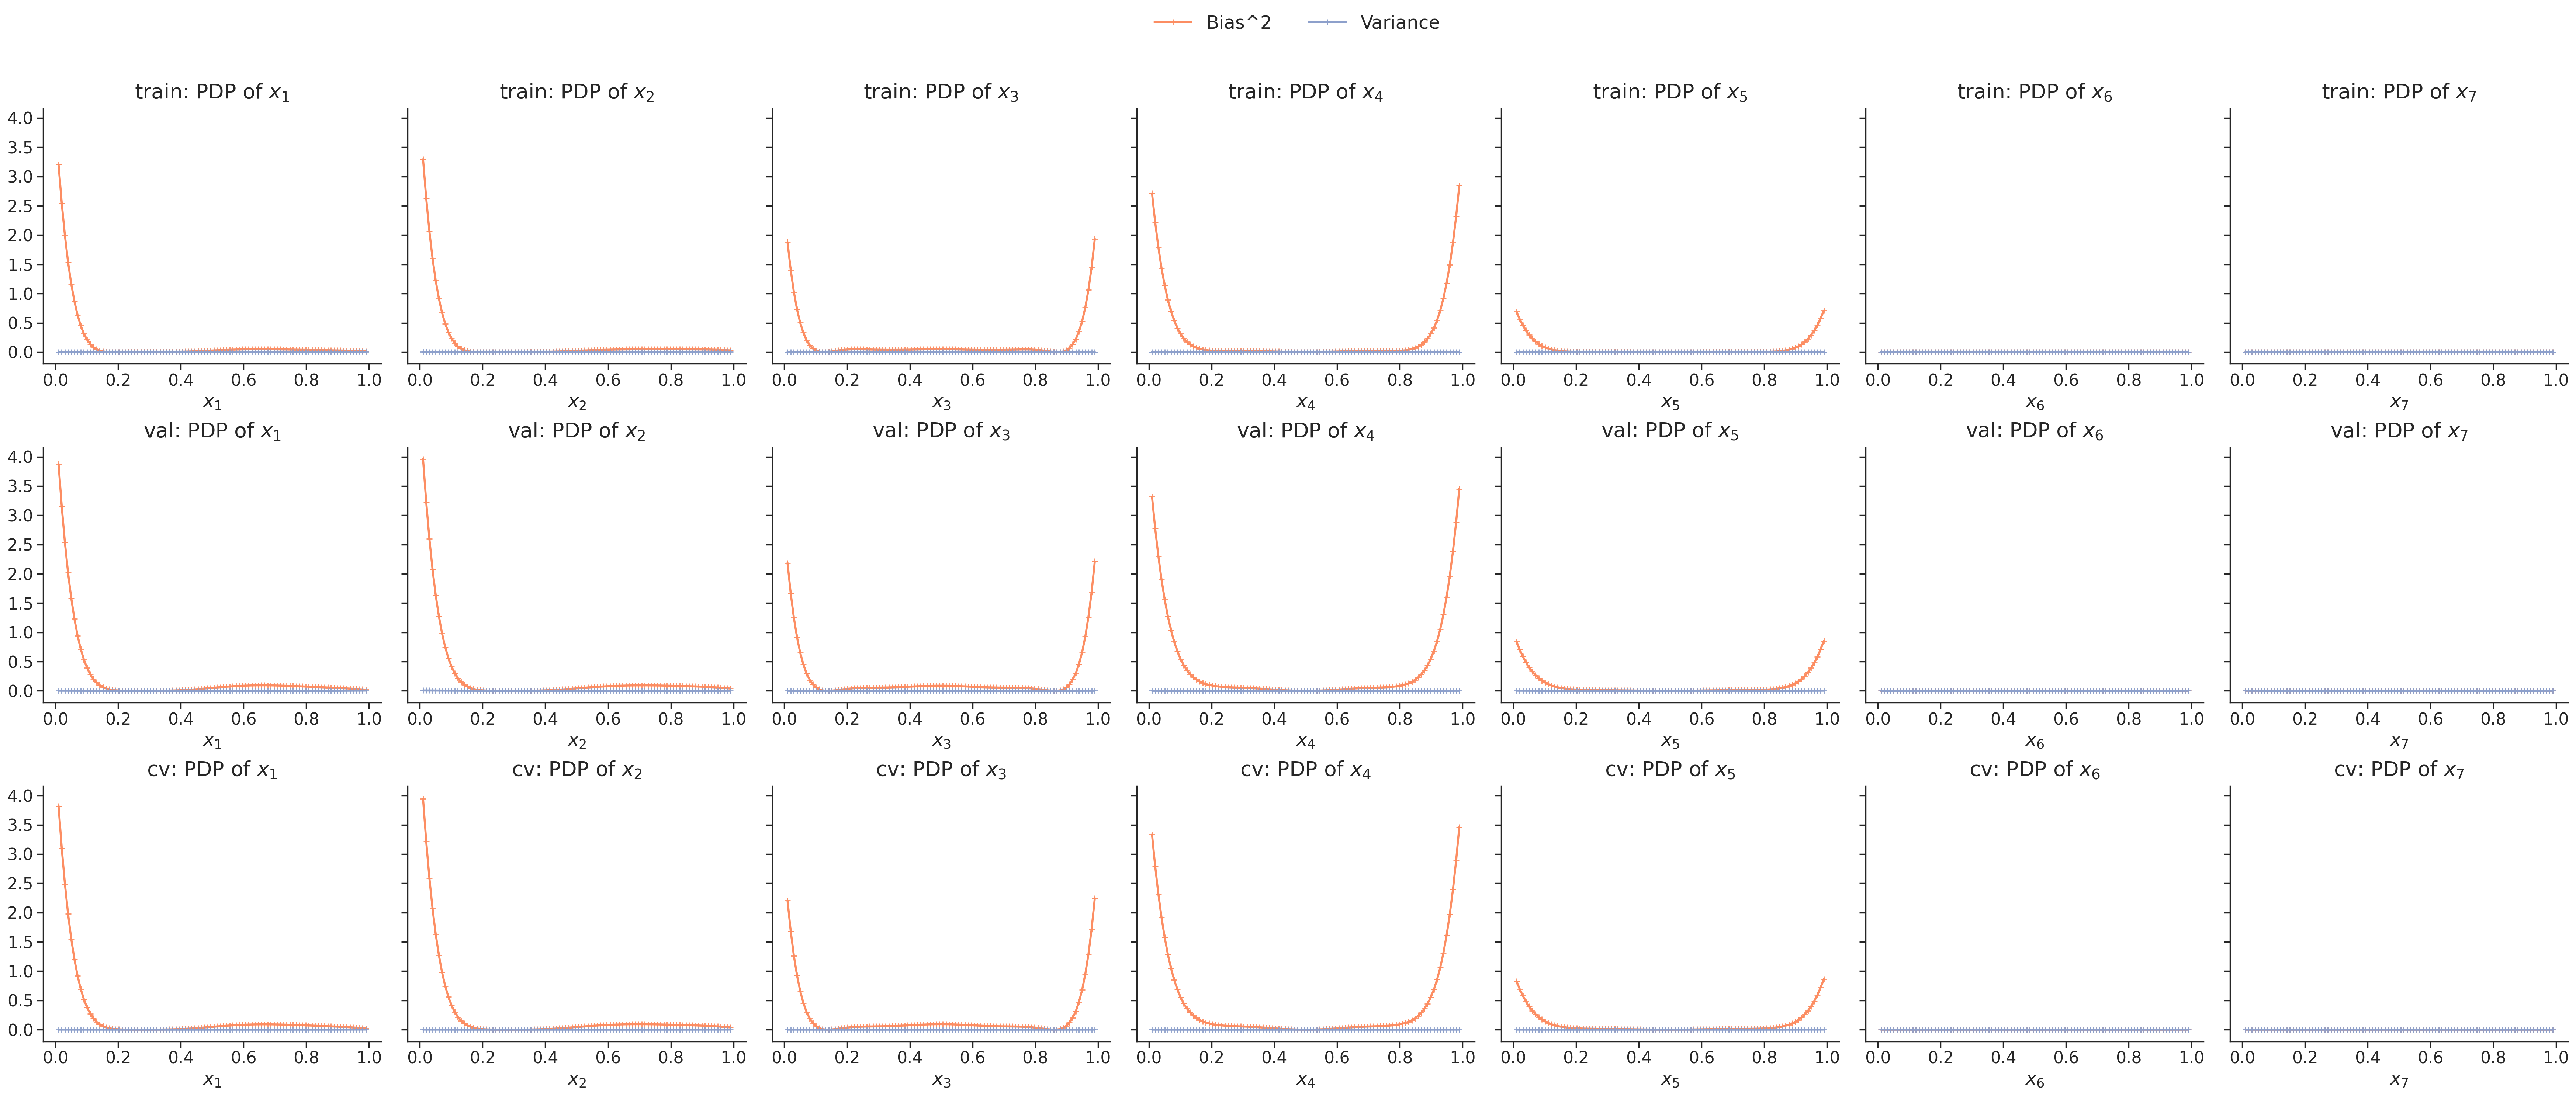

In [30]:
plot_fe_bias_variance(res4, sharey=True, large_font=True)

### Friedman1 XGBoost_OF ALE 8000

In [31]:
res5 = joblib.load("../experiments/main_study_parallel/Friedman1/results/XGBoost_OF/ale_metrics_8000.joblib")

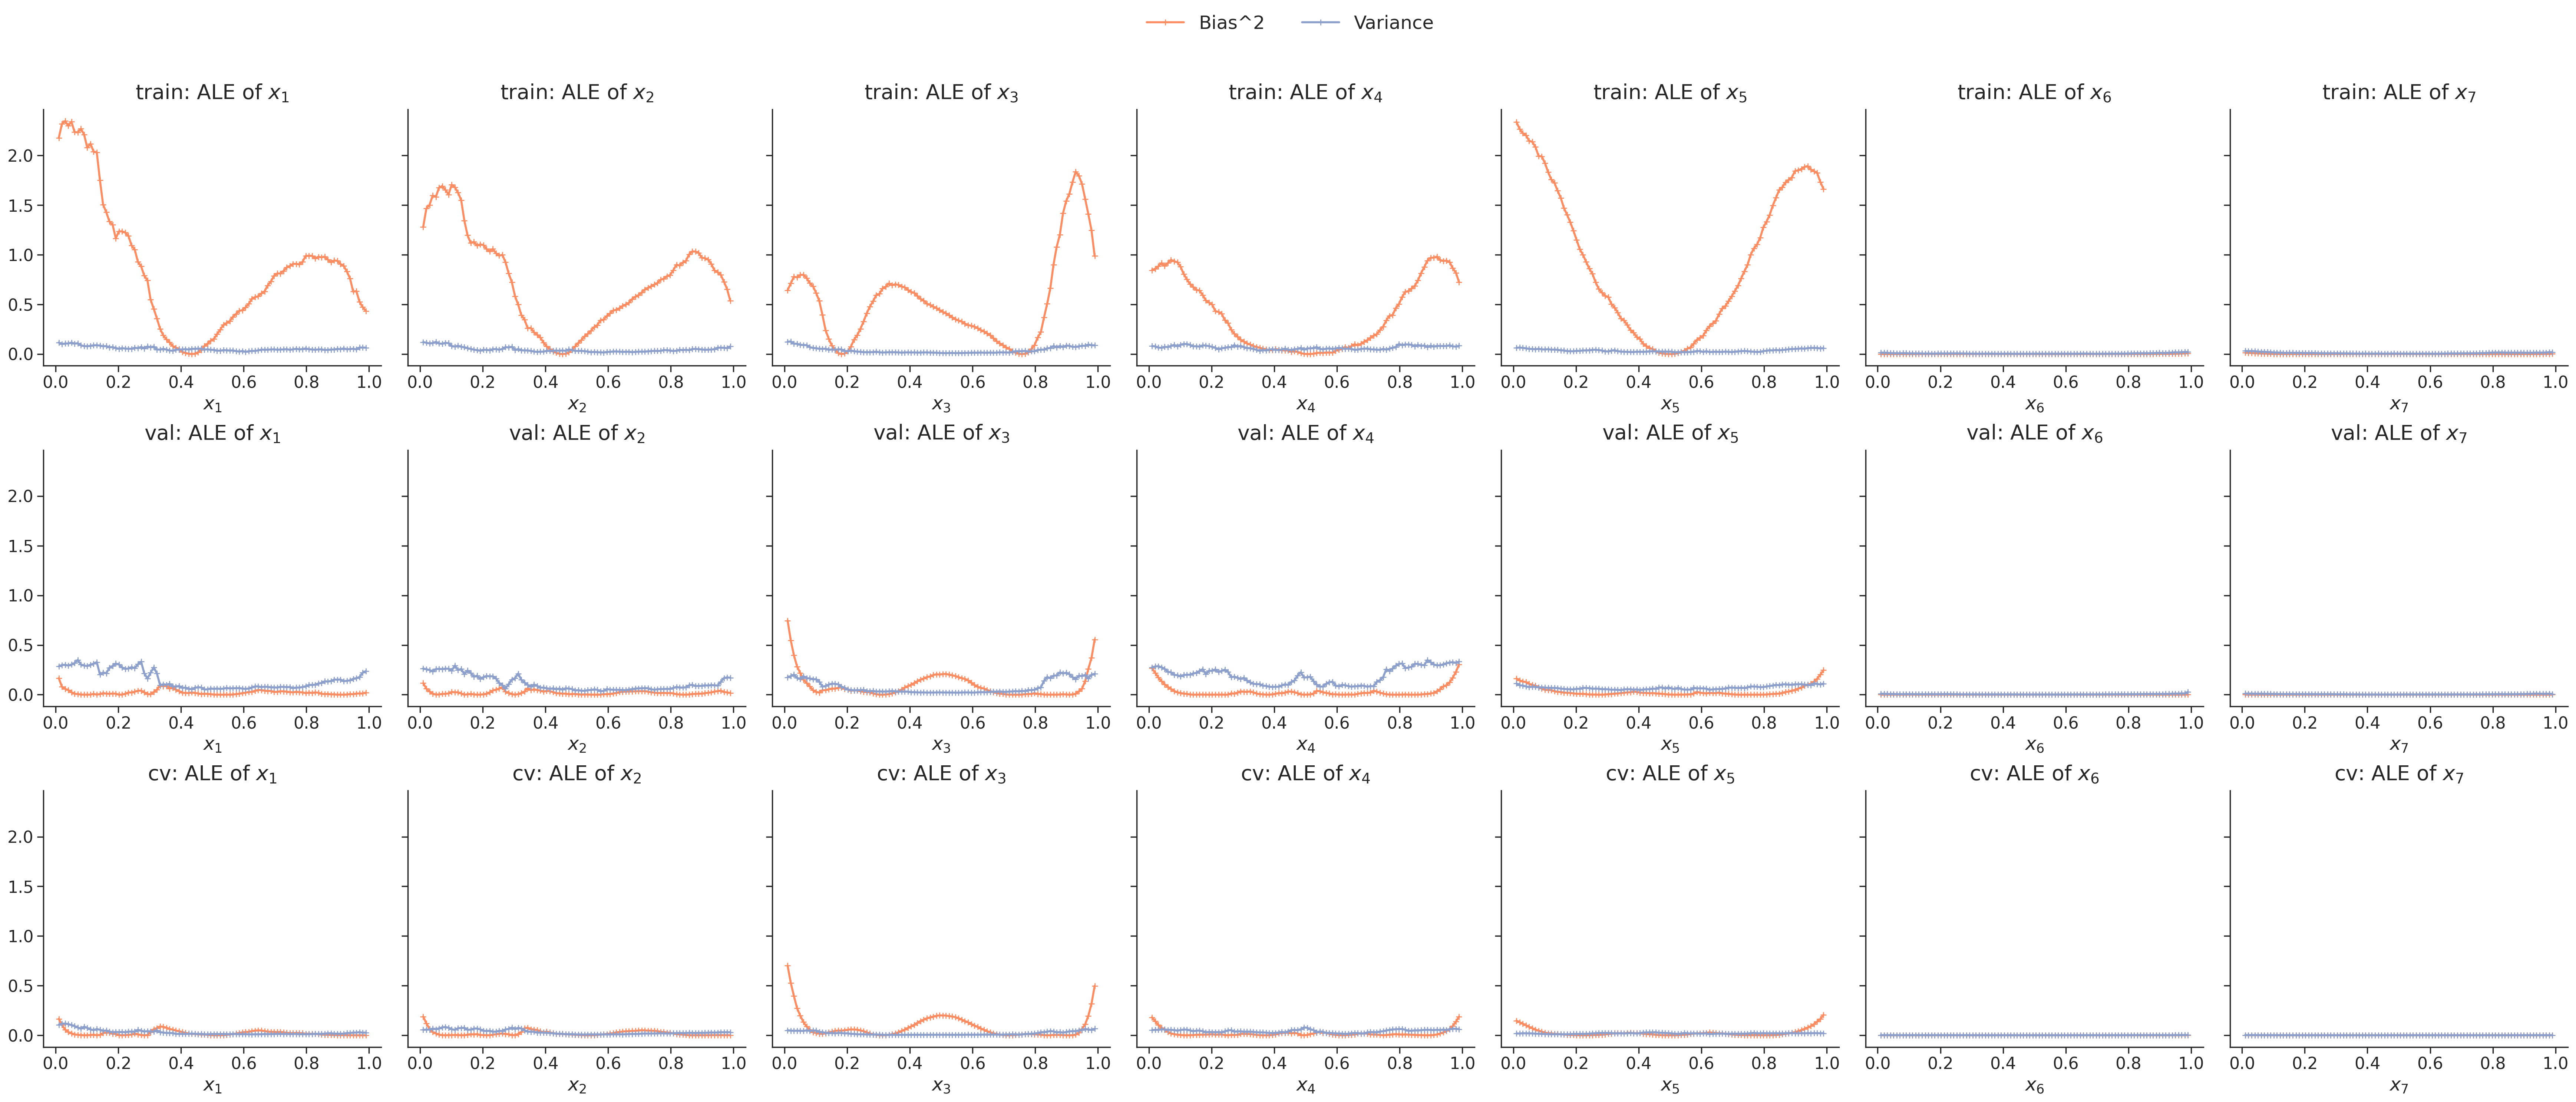

In [32]:
plot_fe_bias_variance(res5, sharey=True, large_font=True)

### Friedman1 XGBoost_OF PDP 8000

In [33]:
res6 = joblib.load("../experiments/main_study_parallel/Friedman1/results/XGBoost_OF/pdp_metrics_8000.joblib")

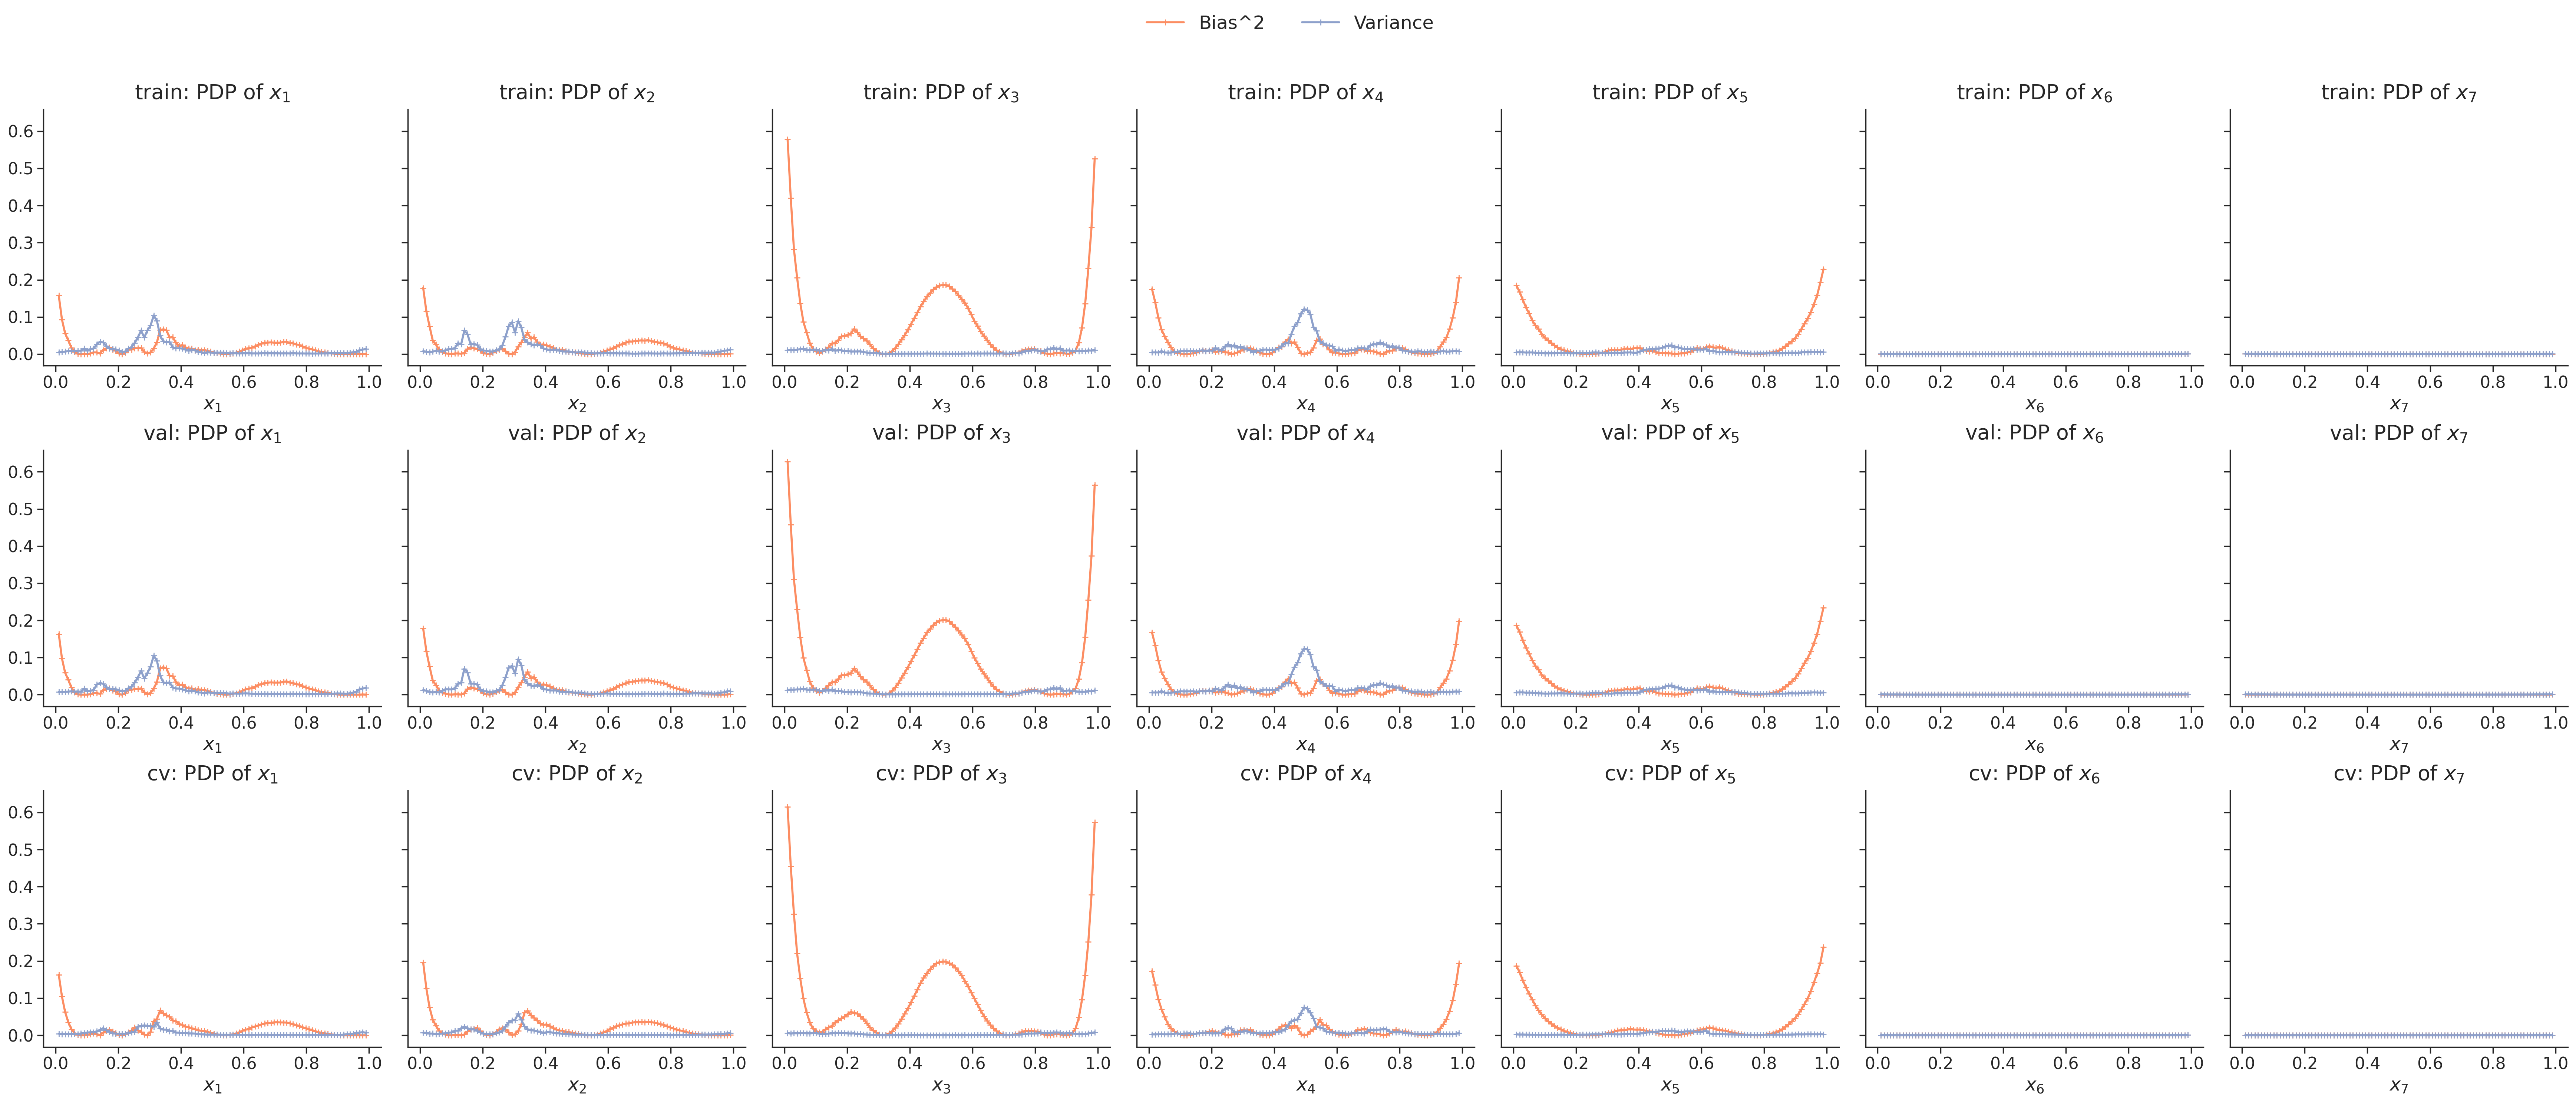

In [34]:
plot_fe_bias_variance(res6, sharey=True, large_font=True)